# DATA SCIENCE Client PROJECT ON BANK GOOD CREDIT

# BUISNESS CASE :-  
   **Bank GoodCredit wants to predict cred score for current credit card customers. The cred score will denote a customer’s credit worthiness and help the bank in reducing credit default risk.**

## TASK :-  CALSSIFICTION TASK

## INTRODUCTION OF PROJECT :-
   * A credit card is a financial instrument, which can be used more than once to borrow money or buy products and services on        credit.
   * Banks, retail stores and other businesses generally issue these.


**Credit limit:-**
   * The maximum amount of charges a card holder may apply to the account.


**Annual Fee:-**
   * A bank charge for use of a credit card levied each year, which ranges depending upon the type of card one possesses.Banks        usually take an initial fixed amount in the first year and thena lower amount as yearly renewal fees. Revolving Line Of          Credit


**TARGET COLUMN == Bad_label**
* 0 Represent--Customer has Good credit history
* 1 Represent--Customer has Bad credit history

## PROJECT GOAL :-

**Build a model with the data provided**

1. Data exploration insights – what did you find and what decision did you take?
2. Feature matrix - List of features selected with gain
3. Model evaluation - Gini and rank ordering

### PROJECT IS DEVICE INTO CERTAIN STEPS :-

1. Featching data from data-base.
2. Domain analysis.
3. EDA: [Univariate, Bivariate & Multivariate analysis condition]
4. Data preprocessing/Feature Engineering.
5. Feature selection.
6. Model creation.
7. Model Evaluation.
8. Model Saving

## Importing Necessary Library :-

In [2]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
import os
import mysql.connector

# To avoid warnings
import warnings
warnings.filterwarnings("ignore")

## Making Connections To Database Server :-

In [3]:
# making connections to database server
connection = mysql.connector.connect(host ='18.136.157.135', # IP-address of data-base
                                    user ='dm_team1', # data-base Username
                                    password ='DM!$Team&279@20!',
                                    database ='project_banking') # data-base Password

In [4]:
connection

In [5]:
# Check the number of databases available on the server
cursor=connection.cursor()
cursor.execute('show databases')
for i in cursor:
    print(i) 
    

('information_schema',)
('project_banking',)


In [6]:
database_tables=pd.read_sql_query('show tables',connection)
print(database_tables)

  Tables_in_project_banking
0              Cust_Account
1         Cust_Demographics
2              Cust_Enquiry


* In this data 3 tables are there.

## Fetching Data From Data Base :-

### 1. Customer Account Data (Table : Cust_Account) :-
* **This table contains customer’s historical accounts data and payments history**

In [7]:
query_1='select *from Cust_Account'
data_1=pd.read_sql(query_1,connection)
pd.set_option('display.max_columns',None)
print(data_1.shape)
data_1.head()

(186329, 21)


dt_opened customer_no  upload_dt acct_type owner_indic  opened_dt  \
0  10-Nov-15       12265  20-Oct-15         6           1  09-Jun-13   
1  10-Nov-15       12265  20-Oct-15        10           1  25-May-12   
2  10-Nov-15       12265  20-Oct-15        10           1  22-Mar-12   
3  20-Jul-15       15606  09-Jul-15        10           1  13-Jan-06   
4  20-Jul-15       15606  09-Jul-15         6           1  18-Jan-15   

  last_paymt_dt  closed_dt reporting_dt high_credit_amt cur_balance_amt  \
0     30-Jun-14  05-Jul-14    30-Sep-15           20900               0   
1     06-Sep-15               03-Oct-15           16201           10390   
2     31-Aug-15               30-Sep-15           41028           34420   
3                26-Jul-07    31-Jan-09           93473               0   
4     05-May-15               31-May-15           20250           13500   

  amt_past_due                                    paymenthistory1  \
0               """STDSTDSTDXXXXXXXXXXXXXXXSTDXXXXXXXXXXXXXXXS...   
1               """0000000000000000000000000000000000000000000...   
2               """0000000000000000000000000000000000000000000...   
3               """1200900600600600300000000000000000000000000...   
4                                           """000000000000000"""   

                                     paymenthistory2 paymt_str_dt  \
0                                                       01-Sep-15   
1  """000000000000000000000000000XXX0000000000000...    01-Oct-15   
2  """0000000000000000000000000000000000000000000...    01-Sep-15   
3                                                       01-Jul-07   
4                                                       01-May-15   

  paymt_end_dt creditlimit cashlimit rateofinterest paymentfrequency  \
0    01-Jul-14                                                         
1    01-Nov-12       14000      1400                               3   
2    01-Oct-12                                                         
3    01-Feb-06                                                         
4    01-Jan-15                                                         

  actualpaymentamount  
0                      
1                5603  
2                      
3                      
4

In [9]:
customer_acc_columns = ['customer_no','high_credit_amt','cur_balance_amt','amt_past_due','cashlimit','creditlimit']
data_cust_acc = data_1.loc[:,customer_acc_columns]
data_cust_acc.head()

customer_no high_credit_amt cur_balance_amt amt_past_due cashlimit  \
0       12265           20900               0                          
1       12265           16201           10390                   1400   
2       12265           41028           34420                          
3       15606           93473               0                          
4       15606           20250           13500                          

  creditlimit  
0              
1       14000  
2              
3              
4

In [10]:
cust_acc_group = data_cust_acc.groupby(['customer_no'])
cust_acc_group.head()

customer_no high_credit_amt cur_balance_amt amt_past_due cashlimit  \
0            12265           20900               0                          
1            12265           16201           10390                   1400   
2            12265           41028           34420                          
3            15606           93473               0                          
4            15606           20250           13500                          
...            ...             ...             ...          ...       ...   
186317        1611           97741               0                          
186318        1611          300000          287017                          
186319        1611           34001               0                          
186320        1611           42320               0                          
186321        1611          130000               0                          

       creditlimit  
0                   
1            14000  
2                   
3                   
4                   
...            ...  
186317              
186318              
186319              
186320       42490  
186321              

[99181 rows x 6 columns]

In [11]:
acc_data = pd.DataFrame(cust_acc_group.sum()).reset_index()
acc_data.head()

customer_no                                    high_credit_amt  \
0           1  2528846125459139765171256290596200000020000009...   
1          10  1111113565675230005500000531458600000111851500...   
2         100      747754333541229800010000454945000034240350000   
3        1000                                 548289548289147688   
4       10000                   52590480000562501997410200520000   

                                  cur_balance_amt amt_past_due   cashlimit  \
0  2528846588820003759832549017546780000093630000  25288469363      168000   
1                           068994000178725000000                   243000   
2                       3970033460980316015530000                980017700   
3                                     31349029113               6750081000   
4                 1752758222031250-26123003454770                    10000   

       creditlimit  
0     250000420000  
1           405000  
2  300009800059000  
3     225000270000  
4            60000

In [13]:
acc_data.to_csv('Cust_Account_data.csv',index=False)
print(acc_data.shape)

(23896, 6)


### 2. Demographics Data (Table : Cust_Demographics) :-
* **Current customer applications with demographic data.**
* **Note that demographics features are renamed as features and obscured in accordance with privacy policies.**

In [16]:
query_2 = 'select *from Cust_Demographics'
data_2=pd.read_sql(query_2,connection)
pd.set_option('display.max_columns',None)
data_2.head()

dt_opened customer_no entry_time feature_1  feature_2 feature_3 feature_4  \
0  18-Apr-15           1  13-Apr-15  Insignia  13-Apr-15       650         2   
1  21-Apr-15           2  21-Apr-15  Insignia  21-Apr-15       760         1   
2  22-Apr-15           3  21-Apr-15  Insignia  21-Apr-15       774         1   
3  25-Apr-15           4  15-Apr-15  Insignia  20-Apr-15       770         1   
4  06-May-15           5  30-Apr-15  Insignia                              3   

    feature_5 feature_6 feature_7 feature_8 feature_9 feature_10 feature_11  \
0  Card Setup        14    500000                                         Y   
1  Card Setup        14   1200000                                         Y   
2  Card Setup        14    700000                                         Y   
3  Card Setup        14    500000                                         Y   
4  Card Setup        14    500000                                         Y   

  feature_12 feature_13 feature_14 feature_15 feature_16 feature_17  \
0        IS1                     0        159       4284       4284   
1        IS1                     0         91       B001       4077   
2        IS1                     0         91       B001       4077   
3        IS1                     0        157       5107       5107   
4        IS1                     0        100       D016       4564   

  feature_18 feature_19  feature_20 feature_21  feature_22 feature_23  \
0                     1  ADFPNXXXXX  03-Sep-65  98332XXXXX          N   
1                     1  AJWPRXXXXX  14-Jul-62  99455XXXXX          N   
2                     2  AFAPNXXXXX  10-Apr-66  98456XXXXX          N   
3                     1  AAAPDXXXXX  16-Apr-64  98220XXXXX          N   
4                     1  ABEPSXXXXX  03-Jan-54  98111XXXXX          N   

          feature_24 feature_25 feature_26 feature_27  \
0    @REDIFFMAIL.COM          1          2              
1         @GMAIL.COM          1          2              
2  @SHOBANARAYAN.COM          1          0              
3          @VSNL.COM          1          3              
4    @REDIFFMAIL.COM          1          3              

                     feature_28 feature_29 feature_30 feature_31 feature_32  \
0  Mumbai / Navi Mumbai / Thane     400610       1965          0       Self   
1                     Bengaluru     560042       1969          0       Self   
2                     Bengaluru     560042       1966          0       Self   
3                          Pune     411001       1988          0       Self   
4                       Gurgaon     122009       1995          0       Self   

  feature_33 feature_34 feature_35 feature_36 feature_37 feature_38  \
0          Y          2      90000                                    
1          Y          2          1                                    
2          Y          2          1                                    
3          Y          2     100000                                    
4          Y          2     300000                                    

  feature_39 feature_40 feature_41 feature_42 feature_43 feature_44  \
0          0          0          0          0     Mumbai     400059   
1          0          0          0          0  Bangalore     560042   
2          0          0          0          0  Bangalore     560042   
3          0          0          0          0       Pune     411026   
4          0          0          0          0    Gurgaon     122009   

        feature_45 feature_46  feature_47              feature_48 feature_49  \
0  @CODOGNOTTO.NET   PAN Card  ADFPNXXXXX  The Ratnakar Bank Ltd.              
1                    PAN Card  AJWPRXXXXX  The Ratnakar Bank Ltd.              
2                    PAN Card  AFAPNXXXXX                                      
3       @ALBAJ.COM   PAN Card  AAAPDXXXXX  The Ratnakar Bank Ltd.              
4                    PAN Card  ABEPSXXXXX  The Ratnakar Bank Ltd.              

  feature_50           featu

In [14]:
demo_data = data_2
print(demo_data.shape)
demo_data.head()

(23896, 83)


dt_opened customer_no entry_time feature_1  feature_2 feature_3 feature_4  \
0  18-Apr-15           1  13-Apr-15  Insignia  13-Apr-15       650         2   
1  21-Apr-15           2  21-Apr-15  Insignia  21-Apr-15       760         1   
2  22-Apr-15           3  21-Apr-15  Insignia  21-Apr-15       774         1   
3  25-Apr-15           4  15-Apr-15  Insignia  20-Apr-15       770         1   
4  06-May-15           5  30-Apr-15  Insignia                              3   

    feature_5 feature_6 feature_7 feature_8 feature_9 feature_10 feature_11  \
0  Card Setup        14    500000                                         Y   
1  Card Setup        14   1200000                                         Y   
2  Card Setup        14    700000                                         Y   
3  Card Setup        14    500000                                         Y   
4  Card Setup        14    500000                                         Y   

  feature_12 feature_13 feature_14 feature_15 feature_16 feature_17  \
0        IS1                     0        159       4284       4284   
1        IS1                     0         91       B001       4077   
2        IS1                     0         91       B001       4077   
3        IS1                     0        157       5107       5107   
4        IS1                     0        100       D016       4564   

  feature_18 feature_19  feature_20 feature_21  feature_22 feature_23  \
0                     1  ADFPNXXXXX  03-Sep-65  98332XXXXX          N   
1                     1  AJWPRXXXXX  14-Jul-62  99455XXXXX          N   
2                     2  AFAPNXXXXX  10-Apr-66  98456XXXXX          N   
3                     1  AAAPDXXXXX  16-Apr-64  98220XXXXX          N   
4                     1  ABEPSXXXXX  03-Jan-54  98111XXXXX          N   

          feature_24 feature_25 feature_26 feature_27  \
0    @REDIFFMAIL.COM          1          2              
1         @GMAIL.COM          1          2              
2  @SHOBANARAYAN.COM          1          0              
3          @VSNL.COM          1          3              
4    @REDIFFMAIL.COM          1          3              

                     feature_28 feature_29 feature_30 feature_31 feature_32  \
0  Mumbai / Navi Mumbai / Thane     400610       1965          0       Self   
1                     Bengaluru     560042       1969          0       Self   
2                     Bengaluru     560042       1966          0       Self   
3                          Pune     411001       1988          0       Self   
4                       Gurgaon     122009       1995          0       Self   

  feature_33 feature_34 feature_35 feature_36 feature_37 feature_38  \
0          Y          2      90000                                    
1          Y          2          1                                    
2          Y          2          1                                    
3          Y          2     100000                                    
4          Y          2     300000                                    

  feature_39 feature_40 feature_41 feature_42 feature_43 feature_44  \
0          0          0          0          0     Mumbai     400059   
1          0          0          0          0  Bangalore     560042   
2          0          0          0          0  Bangalore     560042   
3          0          0          0          0       Pune     411026   
4          0          0          0          0    Gurgaon     122009   

        feature_45 feature_46  feature_47              feature_48 feature_49  \
0  @CODOGNOTTO.NET   PAN Card  ADFPNXXXXX  The Ratnakar Bank Ltd.              
1                    PAN Card  AJWPRXXXXX  The Ratnakar Bank Ltd.              
2                    PAN Card  AFAPNXXXXX                                      
3       @ALBAJ.COM   PAN Card  AAAPDXXXXX  The Ratnakar Bank Ltd.              
4                    PAN Card  ABEPSXXXXX  The Ratnakar Bank Ltd.              

  feature_50           featu

In [15]:
demo_data.to_csv('Cust_Demographics_data.csv',index=False)

### 3. Customer Enquiry Data (Table : Cust_Enquiry) :-
* **This table contains customer’s historical enquiry data such as enquiry amount and enquiry purpose.**

In [17]:
query_3 = 'select *from Cust_Enquiry'
data_3 = pd.read_sql(query_3,connection)
pd.set_option('display.max_columns',None)
print(data_3.shape)
data_3.head()

(413188, 6)


dt_opened customer_no  upload_dt enquiry_dt enq_purpose  enq_amt
0  18-Apr-15           1  21-Apr-15  19-Dec-14           2  3500000
1  18-Apr-15           1  21-Apr-15  05-Mar-14           5   500000
2  18-Apr-15           1  21-Apr-15  05-Mar-14           0    50000
3  18-Apr-15           1  21-Apr-15  22-Feb-14          10    50000
4  18-Apr-15           1  21-Apr-15  11-Jun-13          10     1000

In [18]:
data_3.to_csv('Cust_Enquiry',index=False)
data_3=pd.read_csv('Cust_Enquiry')
data_3.head()

dt_opened  customer_no  upload_dt enquiry_dt  enq_purpose    enq_amt
0  18-Apr-15            1  21-Apr-15  19-Dec-14          2.0  3500000.0
1  18-Apr-15            1  21-Apr-15  05-Mar-14          5.0   500000.0
2  18-Apr-15            1  21-Apr-15  05-Mar-14          0.0    50000.0
3  18-Apr-15            1  21-Apr-15  22-Feb-14         10.0    50000.0
4  18-Apr-15            1  21-Apr-15  11-Jun-13         10.0     1000.0

In [19]:
data_cust_enquiry=data_3.loc[:,['customer_no','enq_amt']]
data_cust_enquiry.head()

customer_no    enq_amt
0            1  3500000.0
1            1   500000.0
2            1    50000.0
3            1    50000.0
4            1     1000.0

In [20]:
Cust_enquiry_group = data_cust_enquiry.groupby(['customer_no'])
Cust_enquiry_group.head()


customer_no    enq_amt
0                 1  3500000.0
1                 1   500000.0
2                 1    50000.0
3                 1    50000.0
4                 1     1000.0
...             ...        ...
413172        23896    10000.0
413173        23896     1000.0
413174        23896    15000.0
413175        23896     1000.0
413176        23896     1000.0

[113409 rows x 2 columns]

In [21]:
enquiry_data_count = pd.DataFrame(Cust_enquiry_group.count()).reset_index()
enquiry_data_count.columns = ['customer_no','total_enq_count']
enquiry_data_count.head()

customer_no  total_enq_count
0            1               18
1            2               68
2            3                1
3            4               34
4            5                2

In [22]:
enquiry_data_amt=pd.DataFrame(Cust_enquiry_group.sum()).reset_index()
enquiry_data_amt.columns = ['customer_no','total_enq_amt']
enquiry_data_amt.head(7)

customer_no  total_enq_amt
0            1   4.981150e+06
1            2   6.676682e+09
2            3   3.400000e+06
3            4   5.081000e+07
4            5   2.000000e+03
5            6   1.356240e+08
6            7   5.000000e+04

In [23]:
enquiry_data =pd.merge(enquiry_data_count,enquiry_data_amt,on='customer_no',how='inner')
enquiry_data.head()

customer_no  total_enq_count  total_enq_amt
0            1               18   4.981150e+06
1            2               68   6.676682e+09
2            3                1   3.400000e+06
3            4               34   5.081000e+07
4            5                2   2.000000e+03

In [24]:
enquiry_data.to_csv('Cust_enquiry_data.csv',index=False)

In [25]:
print(acc_data.shape)
print(demo_data.shape)
print(enquiry_data.shape)

(23896, 6)
(23896, 83)
(23896, 3)


In [26]:
data_merge=pd.merge(demo_data,acc_data,on='customer_no', how='inner')
print(data_merge.shape)
data_merge.head()

(23896, 88)


dt_opened customer_no entry_time feature_1  feature_2 feature_3 feature_4  \
0  18-Apr-15           1  13-Apr-15  Insignia  13-Apr-15       650         2   
1  21-Apr-15           2  21-Apr-15  Insignia  21-Apr-15       760         1   
2  22-Apr-15           3  21-Apr-15  Insignia  21-Apr-15       774         1   
3  25-Apr-15           4  15-Apr-15  Insignia  20-Apr-15       770         1   
4  06-May-15           5  30-Apr-15  Insignia                              3   

    feature_5 feature_6 feature_7 feature_8 feature_9 feature_10 feature_11  \
0  Card Setup        14    500000                                         Y   
1  Card Setup        14   1200000                                         Y   
2  Card Setup        14    700000                                         Y   
3  Card Setup        14    500000                                         Y   
4  Card Setup        14    500000                                         Y   

  feature_12 feature_13 feature_14 feature_15 feature_16 feature_17  \
0        IS1                     0        159       4284       4284   
1        IS1                     0         91       B001       4077   
2        IS1                     0         91       B001       4077   
3        IS1                     0        157       5107       5107   
4        IS1                     0        100       D016       4564   

  feature_18 feature_19  feature_20 feature_21  feature_22 feature_23  \
0                     1  ADFPNXXXXX  03-Sep-65  98332XXXXX          N   
1                     1  AJWPRXXXXX  14-Jul-62  99455XXXXX          N   
2                     2  AFAPNXXXXX  10-Apr-66  98456XXXXX          N   
3                     1  AAAPDXXXXX  16-Apr-64  98220XXXXX          N   
4                     1  ABEPSXXXXX  03-Jan-54  98111XXXXX          N   

          feature_24 feature_25 feature_26 feature_27  \
0    @REDIFFMAIL.COM          1          2              
1         @GMAIL.COM          1          2              
2  @SHOBANARAYAN.COM          1          0              
3          @VSNL.COM          1          3              
4    @REDIFFMAIL.COM          1          3              

                     feature_28 feature_29 feature_30 feature_31 feature_32  \
0  Mumbai / Navi Mumbai / Thane     400610       1965          0       Self   
1                     Bengaluru     560042       1969          0       Self   
2                     Bengaluru     560042       1966          0       Self   
3                          Pune     411001       1988          0       Self   
4                       Gurgaon     122009       1995          0       Self   

  feature_33 feature_34 feature_35 feature_36 feature_37 feature_38  \
0          Y          2      90000                                    
1          Y          2          1                                    
2          Y          2          1                                    
3          Y          2     100000                                    
4          Y          2     300000                                    

  feature_39 feature_40 feature_41 feature_42 feature_43 feature_44  \
0          0          0          0          0     Mumbai     400059   
1          0          0          0          0  Bangalore     560042   
2          0          0          0          0  Bangalore     560042   
3          0          0          0          0       Pune     411026   
4          0          0          0          0    Gurgaon     122009   

        feature_45 feature_46  feature_47              feature_48 feature_49  \
0  @CODOGNOTTO.NET   PAN Card  ADFPNXXXXX  The Ratnakar Bank Ltd.              
1                    PAN Card  AJWPRXXXXX  The Ratnakar Bank Ltd.              
2                    PAN Card  AFAPNXXXXX                                      
3       @ALBAJ.COM   PAN Card  AAAPDXXXXX  The Ratnakar Bank Ltd.              
4                    PAN Card  ABEPSXXXXX  The Ratnakar Bank Ltd.              

  feature_50           featu

In [27]:
data_final=pd.concat([data_merge,enquiry_data],axis=1)
print(data_final.shape)
data_final.head()

(23896, 91)


dt_opened  customer_no entry_time feature_1  feature_2 feature_3 feature_4  \
0  18-Apr-15            1  13-Apr-15  Insignia  13-Apr-15       650         2   
1  21-Apr-15            2  21-Apr-15  Insignia  21-Apr-15       760         1   
2  22-Apr-15            3  21-Apr-15  Insignia  21-Apr-15       774         1   
3  25-Apr-15            4  15-Apr-15  Insignia  20-Apr-15       770         1   
4  06-May-15            5  30-Apr-15  Insignia                              3   

    feature_5 feature_6 feature_7 feature_8 feature_9 feature_10 feature_11  \
0  Card Setup        14    500000                                         Y   
1  Card Setup        14   1200000                                         Y   
2  Card Setup        14    700000                                         Y   
3  Card Setup        14    500000                                         Y   
4  Card Setup        14    500000                                         Y   

  feature_12 feature_13 feature_14 feature_15 feature_16 feature_17  \
0        IS1                     0        159       4284       4284   
1        IS1                     0         91       B001       4077   
2        IS1                     0         91       B001       4077   
3        IS1                     0        157       5107       5107   
4        IS1                     0        100       D016       4564   

  feature_18 feature_19  feature_20 feature_21  feature_22 feature_23  \
0                     1  ADFPNXXXXX  03-Sep-65  98332XXXXX          N   
1                     1  AJWPRXXXXX  14-Jul-62  99455XXXXX          N   
2                     2  AFAPNXXXXX  10-Apr-66  98456XXXXX          N   
3                     1  AAAPDXXXXX  16-Apr-64  98220XXXXX          N   
4                     1  ABEPSXXXXX  03-Jan-54  98111XXXXX          N   

          feature_24 feature_25 feature_26 feature_27  \
0    @REDIFFMAIL.COM          1          2              
1         @GMAIL.COM          1          2              
2  @SHOBANARAYAN.COM          1          0              
3          @VSNL.COM          1          3              
4    @REDIFFMAIL.COM          1          3              

                     feature_28 feature_29 feature_30 feature_31 feature_32  \
0  Mumbai / Navi Mumbai / Thane     400610       1965          0       Self   
1                     Bengaluru     560042       1969          0       Self   
2                     Bengaluru     560042       1966          0       Self   
3                          Pune     411001       1988          0       Self   
4                       Gurgaon     122009       1995          0       Self   

  feature_33 feature_34 feature_35 feature_36 feature_37 feature_38  \
0          Y          2      90000                                    
1          Y          2          1                                    
2          Y          2          1                                    
3          Y          2     100000                                    
4          Y          2     300000                                    

  feature_39 feature_40 feature_41 feature_42 feature_43 feature_44  \
0          0          0          0          0     Mumbai     400059   
1          0          0          0          0  Bangalore     560042   
2          0          0          0          0  Bangalore     560042   
3          0          0          0          0       Pune     411026   
4          0          0          0          0    Gurgaon     122009   

        feature_45 feature_46  feature_47              feature_48 feature_49  \
0  @CODOGNOTTO.NET   PAN Card  ADFPNXXXXX  The Ratnakar Bank Ltd.              
1                    PAN Card  AJWPRXXXXX  The Ratnakar Bank Ltd.              
2                    PAN Card  AFAPNXXXXX                                      
3       @ALBAJ.COM   PAN Card  AAAPDXXXXX  The Ratnakar Bank Ltd.              
4                    PAN Card  ABEPSXXXXX  The Ratnakar Bank Ltd.              

  feature_50          

In [28]:
data_final.to_csv('Bank_GoodCredit_data.csv')

## Data Loading :-

In [3]:
data=pd.read_csv('Bank_GoodCredit_data.csv')

In [4]:
pd.set_option('display.max_columns',None)
data.head()

Unnamed: 0  dt_opened  customer_no entry_time feature_1  feature_2  \
0           0  18-Apr-15            1  13-Apr-15  Insignia  13-Apr-15   
1           1  21-Apr-15            2  21-Apr-15  Insignia  21-Apr-15   
2           2  22-Apr-15            3  21-Apr-15  Insignia  21-Apr-15   
3           3  25-Apr-15            4  15-Apr-15  Insignia  20-Apr-15   
4           4  06-May-15            5  30-Apr-15  Insignia        NaN   

   feature_3  feature_4   feature_5  feature_6  feature_7 feature_8 feature_9  \
0      650.0        2.0  Card Setup       14.0   500000.0       NaN       NaN   
1      760.0        1.0  Card Setup       14.0  1200000.0       NaN       NaN   
2      774.0        1.0  Card Setup       14.0   700000.0       NaN       NaN   
3      770.0        1.0  Card Setup       14.0   500000.0       NaN       NaN   
4        NaN        3.0  Card Setup       14.0   500000.0       NaN       NaN   

  feature_10 feature_11 feature_12 feature_13  feature_14 feature_15  \
0        NaN          Y        IS1        NaN         0.0        159   
1        NaN          Y        IS1        NaN         0.0         91   
2        NaN          Y        IS1        NaN         0.0         91   
3        NaN          Y        IS1        NaN         0.0        157   
4        NaN          Y        IS1        NaN         0.0        100   

  feature_16 feature_17 feature_18  feature_19  feature_20 feature_21  \
0       4284       4284        NaN         1.0  ADFPNXXXXX  03-Sep-65   
1       B001       4077        NaN         1.0  AJWPRXXXXX  14-Jul-62   
2       B001       4077        NaN         2.0  AFAPNXXXXX  10-Apr-66   
3       5107       5107        NaN         1.0  AAAPDXXXXX  16-Apr-64   
4       D016       4564        NaN         1.0  ABEPSXXXXX  03-Jan-54   

   feature_22 feature_23         feature_24  feature_25  feature_26  \
0  98332XXXXX          N    @REDIFFMAIL.COM         1.0         2.0   
1  99455XXXXX          N         @GMAIL.COM         1.0         2.0   
2  98456XXXXX          N  @SHOBANARAYAN.COM         1.0         0.0   
3  98220XXXXX          N          @VSNL.COM         1.0         3.0   
4  98111XXXXX          N    @REDIFFMAIL.COM         1.0         3.0   

  feature_27                    feature_28  feature_29  feature_30  \
0        NaN  Mumbai / Navi Mumbai / Thane    400610.0      1965.0   
1        NaN                     Bengaluru    560042.0      1969.0   
2        NaN                     Bengaluru    560042.0      1966.0   
3        NaN                          Pune    411001.0      1988.0   
4        NaN                       Gurgaon    122009.0      1995.0   

   feature_31 feature_32 feature_33  feature_34  feature_35 feature_36  \
0         0.0       Self          Y         2.0     90000.0        NaN   
1         0.0       Self          Y         2.0         1.0        NaN   
2         0.0       Self          Y         2.0         1.0        NaN   
3         0.0       Self          Y         2.0    100000.0        NaN   
4         0.0       Self          Y         2.0    300000.0        NaN   

  feature_37 feature_38  feature_39  feature_40  feature_41  feature_42  \
0        NaN        NaN         0.0         0.0         0.0         0.0   
1        NaN        NaN         0.0         0.0         0.0         0.0   
2        NaN        NaN         0.0         0.0         0.0         0.0   
3        NaN        NaN         0.0         0.0         0.0         0.0   
4        NaN        NaN         0.0         0.0         0.0         0.0   

  feature_43  feature_44       feature_45 feature_46  feature_47  \
0     Mumbai    400059.0  @CODOGNOTTO.NET   PAN Card  ADFPNXXXXX   
1  Bangalore    560042.0              NaN   PAN Card  AJWPRXXXXX   
2  Bangalore    560042.0              NaN   PAN Card  AFAPNXXXXX   
3       Pune    411026.0       @ALBAJ.COM   PAN Card  AAAPDXXXXX   
4    Gurgaon    122009.0              NaN   PAN Card  ABEPSXXXXX   

               feature_48  feature_49 feature_50    

In [139]:
data.tail()

Unnamed: 0  customer_no  feature_2  feature_3  feature_4  feature_7  \
23891       23891        23892          0          0         -1          0   
23892       23892        23893          0          0          0         -1   
23893       23893        23894          0          0          0          0   
23894       23894        23895          0          0          0          0   
23895       23895        23896          0          0         -1          0   

       feature_11  feature_12  feature_15  feature_16  feature_19  feature_21  \
23891           0           0           0           0           0           0   
23892           0           0           0           0           0           0   
23893           0           0          -2           0           0           0   
23894           0           0           0           0           0           0   
23895           0           1           0           0           0           0   

       feature_23  feature_24  feature_25  feature_26  feature_27  feature_28  \
23891           0           1           1           0           0           0   
23892           0           0           1           0           0           0   
23893           1           0           1           0           0           0   
23894           0           0           0           0           0           0   
23895           0           0           0           0           0          -1   

       feature_29  feature_30  feature_31  feature_32  feature_33  feature_34  \
23891           0           0          10           0           0           0   
23892           0           0          12           0          -1           0   
23893           0           0           0           0           0           0   
23894           0           0           0           0           0           1   
23895           0           0           0           0           0           1   

       feature_35  feature_36  feature_37  feature_40  feature_41  feature_42  \
23891           0           0           6           0           0           6   
23892           0           0           6           1           0           0   
23893           0           0           1           0           0           0   
23894           0           0           0           0           0           0   
23895           0           0           0           0           0           0   

       feature_43  feature_46  feature_48  feature_50  feature_52  feature_56  \
23891          -1           0           0           0           0           0   
23892           0           0           0          -1           0           0   
23893          -1           0           0           0           0           0   
23894           0           0           0           0           0           0   
23895          -1           0           0           0           0           7   

       feature_58  feature_59  feature_60  feature_62  feature_64  feature_65  \
23891           0           0           0           0           0           0   
23892           0           0           0           0           2           0   
23893           0           0           0           0           0           0   
23894           0           0           0           0           0           0   
23895           0           0           0           0           2           0   

       feature_66  feature_67  feature_68  feature_69  feature_71  feature_72  \
23891           0           0           0           0           0           0   
23892           0           1           0           0           0          -1   
23893           0           0           0           0           0           0   
23894           0           0           1           0           0           0   
23895           0           0           1           0           3           0   

       feature_75  feature_76  feature_78  feature_79  high_credit_amt  \
23891           0           0           0           0  

In [138]:
data.shape

(23896, 59)

* Total 23896 observation with 92 feature





In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23896 entries, 0 to 23895
Data columns (total 92 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       23896 non-null  int64  
 1   dt_opened        23896 non-null  object 
 2   customer_no      23896 non-null  int64  
 3   entry_time       23881 non-null  object 
 4   feature_1        23881 non-null  object 
 5   feature_2        21060 non-null  object 
 6   feature_3        21060 non-null  float64
 7   feature_4        23881 non-null  float64
 8   feature_5        23881 non-null  object 
 9   feature_6        23881 non-null  float64
 10  feature_7        23881 non-null  float64
 11  feature_8        1261 non-null   object 
 12  feature_9        1261 non-null   object 
 13  feature_10       51 non-null     object 
 14  feature_11       23881 non-null  object 
 15  feature_12       23881 non-null  object 
 16  feature_13       10892 non-null  object 
 17  feature_14  

* In this data all types of datatype is available

## Statistical Measures Of Data :-

In [8]:
data.describe()

Unnamed: 0   customer_no     feature_3     feature_4  feature_6  \
count  23896.000000  23896.000000  21060.000000  23881.000000    23881.0   
mean   11947.500000  11948.500000    723.235945      2.321595       14.0   
std     6898.325352   6898.325352     37.318684      0.892838        0.0   
min        0.000000      1.000000     -1.000000      1.000000       14.0   
25%     5973.750000   5974.750000    698.000000      1.000000       14.0   
50%    11947.500000  11948.500000    721.000000      3.000000       14.0   
75%    17921.250000  17922.250000    745.000000      3.000000       14.0   
max    23895.000000  23896.000000    896.000000      3.000000       14.0   

          feature_7    feature_14    feature_19    feature_25    feature_26  \
count  2.388100e+04  16163.000000  23881.000000  23881.000000  23881.000000   
mean   1.190705e+05      8.086618      1.049412      1.233910      0.725640   
std    7.752349e+04      5.625654      0.216731      0.423324      1.124986   
min    0.000000e+00      0.000000      1.000000      1.000000      0.000000   
25%    7.200000e+04      0.000000      1.000000      1.000000      0.000000   
50%    1.040000e+05     12.000000      1.000000      1.000000      0.000000   
75%    1.390000e+05     12.000000      1.000000      1.000000      2.000000   
max    1.217000e+06     12.000000      2.000000      2.000000     10.000000   

          feature_29    feature_30    feature_31    feature_34    feature_35  \
count   23881.000000  23881.000000  23881.000000  23881.000000  2.388100e+04   
mean   217620.229346   2001.183996      0.652318      1.238851  3.278933e+04   
std    159267.102213     11.993426      2.343709      0.430009  1.087860e+05   
min    110001.000000   1964.000000      0.000000      1.000000  1.000000e+00   
25%    110051.000000   1991.000000      0.000000      1.000000  1.000000e+00   
50%    110094.000000   2005.000000      0.000000      1.000000  3.000000e+04   
75%    390002.000000   2011.000000      0.000000      1.000000  4.300000e+04   
max    712245.000000   2015.000000     12.000000      3.000000  1.500000e+07   

         feature_39    feature_40    feature_41    feature_42     feature_44  \
count  23881.000000  23881.000000  23881.000000  23881.000000   23881.000000   
mean    1533.268707      3.348352      5.702609      0.154139  222251.238474   
std      855.273257      3.587043      4.159316      0.930806  156846.154943   
min        0.000000      0.000000      0.000000      0.000000       0.000000   
25%     1999.000000      0.000000      1.000000      0.000000  110044.000000   
50%     2010.000000      2.000000      6.000000      0.000000  122001.000000   
75%     2013.000000      6.000000     10.000000      0.000000  390002.000000   
max     2015.000000     12.000000     11.000000     11.000000  712201.000000   

         feature_49    feature_52    feature_55    feature_56    feature_64  \
count  1.040000e+02  2.388100e+04  23881.000000  23881.000000  23881.000000   
mean   2.724312e+11  6.500073e+04      1.085717     13.337465     14.587454   
std    1.223114e+11  1.008225e+05      0.388569      8.285993      9.518517   
min    7.568570e+05  0.000000e+00      1.000000      2.000000      2.000000   
25%    3.090000e+11  0.000000e+00      1.000000     10.000000     10.000000   
50%    3.090000e+11  5.000000e+04      1.000000     10.000000     10.000000   
75%    3.090000e+11  1.000000e+05      1.000000     13.000000     21.000000   
max    8.090000e+11  3.777000e+06      4.000000     35.000000     35.000000   

         feature_65     feature_66    feature_67    feature_68    feature_69  \
count  23881.000000   23881.000000  23881.000000  23881.000000  2.388100e+04   
mean     157.609732  264374.021440      0.184373      1.238851  3.278933e+04   
std      190.979066  202001.890433      0.387796      0.430009  1.087860e+05   
min        1.000000  110001.000000      0.000000      1.000000  1.000000e+00   
25%       39.000000  110059.000000      0.000000      1.00

In [9]:
data.describe(include="O")

dt_opened entry_time        feature_1  feature_2   feature_5  \
count       23896      23881            23881      21060       23881   
unique        197        296                7        281           1   
top     16-Nov-15  19-Oct-15  Platinum Maxima  19-Oct-15  Card Setup   
freq          699        180             9056        182       23881   

       feature_8                          feature_9 feature_10 feature_11  \
count       1261                               1261         51      23881   
unique        19                                 19          9          2   
top        ROTVR  Negative Office Tele Verification   3.09E+11          Y   
freq         336                                336         35      22611   

       feature_12 feature_13 feature_15 feature_16 feature_17 feature_18  \
count       23881      10892      23873      23869       1027         18   
unique         16         14        364        522        302         12   
top           PM1        PD3       SA03       AS19       5622        180   
freq         8853       8416       9331       1374        169          5   

        feature_20 feature_21  feature_22 feature_23  feature_24 feature_27  \
count        23896      23881       23896      23881       23256      20259   
unique       10610       8462        3251          2         721         10   
top     AXMPKXXXXX  01-Jan-85  99999XXXXX          N  @GMAIL.COM   Graduate   
freq            16         33         194      21528       15595      14610   

       feature_28 feature_32 feature_33        feature_36  \
count       23881      23881      23881             18214   
unique         62          5          2                 9   
top     New Delhi       Self          Y  Private Ltd. Co.   
freq        12539      10833      19478              8677   

                        feature_37 feature_38 feature_43  feature_45  \
count                        18214      18214      23881       10183   
unique                          11       5663         70        4472   
top     Banking/Financial Services    MANAGER  New Delhi  @GMAIL.COM   
freq                         13187       1624       9760        1854   

       feature_46 feature_47 feature_48 feature_50 feature_51 feature_53  \
count       23802      23896       5497      23881      12474      12286   
unique          5      11250         56          2         10        180   
top      PAN Card      XXXXX  HDFC Bank          Y  HDFC Bank  01-Jun-14   
freq        22796         94       1368      12565       5704        624   

       feature_54 feature_57 feature_58 feature_59 feature_60 feature_61  \
count       23881       2393      23881      23881      23881          9   
unique          1          2          2          2          2          8   
top     17-Jun-16          Y          N          Y          N     GNWX-B   
freq        23881       2242      23425      22611      23563          2   

       feature_62 feature_63 feature_70 feature_72 feature_73  feature_75  \
count       23881      23881      23881      23881       2945       23881   
unique          2        491        133          2          2          62   
top             Y     2010-0        0-0          R          Y  0000-00-00   
freq        23876       1670      18235      15617       2126       23820   

       feature_77 feature_79 high_credit_amt cur_balance_amt cashlimit  \
count       23896      23881           23883           23896     18435   
unique       3124          2           23802           23627      8286   
top         XXXXX          N    100000100000               0     10000   
freq         2149      23876              13              73       652   

       creditlimit  
count        19872  
unique       10944  
top          50000  
freq           369

* In this data one constant column is available(feature_6)

In [10]:
data.drop('feature_6', inplace=True, axis=1)

## Explotary Data Analysis :-

**Remove the special character**

In [11]:
data = data.replace('[\£#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~]','',regex=True)

### Target Column :-

In [12]:
data.Bad_label.value_counts()

0    22892
1     1004
Name: Bad_label, dtype: int64

**Bad_label :-**
* 0 Represent--> Customer has Good credit history.
* 1 Represent--> Customer has Bad credit history.

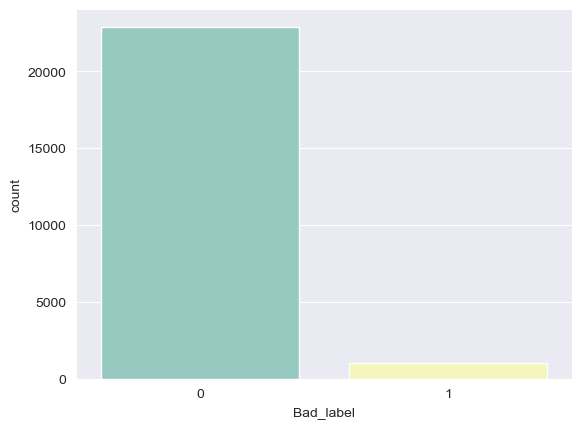

In [13]:
plt.style.use("dark_background")
sns.set_style('darkgrid')
sns.countplot(data.Bad_label)
plt.show()

* In this plot we are clearly seen the 90% Customer has Good credit and 10% customer are did not do has Good credit.
* This target feature is does not balance.

## Data Preprocessing / Feature Enigneering :-


### 1.CHECK MISSING VALUE :-

In [14]:
pd.set_option('display.max_rows',None)
data.isnull().sum()

Unnamed: 0             0
dt_opened              0
customer_no            0
entry_time            15
feature_1             15
feature_2           2836
feature_3           2836
feature_4             15
feature_5             15
feature_7             15
feature_8          22635
feature_9          22635
feature_10         23845
feature_11            15
feature_12            15
feature_13         13004
feature_14          7733
feature_15            23
feature_16            27
feature_17         22869
feature_18         23878
feature_19            15
feature_20             0
feature_21            15
feature_22             0
feature_23            15
feature_24           640
feature_25            15
feature_26            15
feature_27          3637
feature_28            15
feature_29            15
feature_30            15
feature_31            15
feature_32            15
feature_33            15
feature_34            15
feature_35            15
feature_36          5682
feature_37          5682


* In this data set most of the feature contain missing     value with including unique feature.
* Numerical feature missing value impute with               Median/Mean.
* Categorical feature missing value impute with  mode(use   fillna function to impute categorical value).

In [15]:
#Create function to check missing value with percentage
def missing_value(data):
    null_value = data.isnull().sum()
    percentage = (data.isnull().sum()/data.isnull().count()*100)
    null_value = pd.concat([null_value,percentage],axis=1,keys=['Missing Number','Missing Percentage'])
    return null_value
missing_value(data)

Missing Number  Missing Percentage
Unnamed: 0                    0            0.000000
dt_opened                     0            0.000000
customer_no                   0            0.000000
entry_time                   15            0.062772
feature_1                    15            0.062772
feature_2                  2836           11.868095
feature_3                  2836           11.868095
feature_4                    15            0.062772
feature_5                    15            0.062772
feature_7                    15            0.062772
feature_8                 22635           94.722966
feature_9                 22635           94.722966
feature_10                23845           99.786575
feature_11                   15            0.062772
feature_12                   15            0.062772
feature_13                13004           54.419150
feature_14                 7733           32.361065
feature_15                   23            0.096250
feature_16                   27            0.112990
feature_17                22869           95.702210
feature_18                23878           99.924674
feature_19                   15            0.062772
feature_20                    0            0.000000
feature_21                   15            0.062772
feature_22                    0            0.000000
feature_23                   15            0.062772
feature_24                  640            2.678273
feature_25                   15            0.062772
feature_26                   15            0.062772
feature_27                 3637           15.220121
feature_28                   15            0.062772
feature_29                   15            0.062772
feature_30                   15            0.062772
feature_31                   15            0.062772
feature_32                   15            0.062772
feature_33                   15            0.062772
feature_34                   15            0.062772
feature_35                   15            0.062772
feature_36                 5682           23.778038
feature_37                 5682           23.778038
feature_38                 5682           23.778038
feature_39                   15            0.062772
feature_40                   15            0.062772
feature_41                   15            0.062772
feature_42                   15            0.062772
feature_43                   15            0.062772
feature_44                   15            0.062772
feature_45                13713           57.386173
feature_46                   94            0.393371
feature_47                    0            0.000000
feature_48                18399           76.996150
feature_49                23792           99.564781
feature_50                   15            0.062772
feature_51                11422           47.798795
feature_52                   15            0.062772
feature_53                11610           48.585537
feature_54                   15            0.062772
feature_55                   15            0.062772
feature_56                   15            0.062772
feature_57                21503           89.985772
feature_58                   15            0.062772
feature_59                   15            0.062772
feature_60                   15            0.062772
feature_61                23887           99.962337
feature_62                   15            0.062772
feature_63                   15            0.062772
feature_64                   15            0.062772
feature_65                   15            0.062772
feature_66                   15            0.062772
feature_67                   15            0.062772
feature_68                   15            0.062772
feature_69                   15            0.062772
feature_70                   15            0.062772
feature_71                   15            0.062772
feature_72                   15            0.062772
feature_73                20951           87.675762
feature_74   

In [16]:
data_1 = ['feature_8','feature_9','feature_10','feature_13','feature_14','feature_17',
'feature_18','feature_38','feature_45',
'feature_49','feature_51','feature_53','feature_57','feature_61','feature_73','feature_74','amt_past_due']

In [17]:
data.drop(data_1, inplace=True, axis=1)


* 17 Features has more than 15% to 90% missing value and some unique feature also contain missing value so we drop this feature.
* Remaining feature missing value is less than 15% so we impute the missing value.

In [18]:
data.isnull().sum().sum()

50089

**Numerical :-**

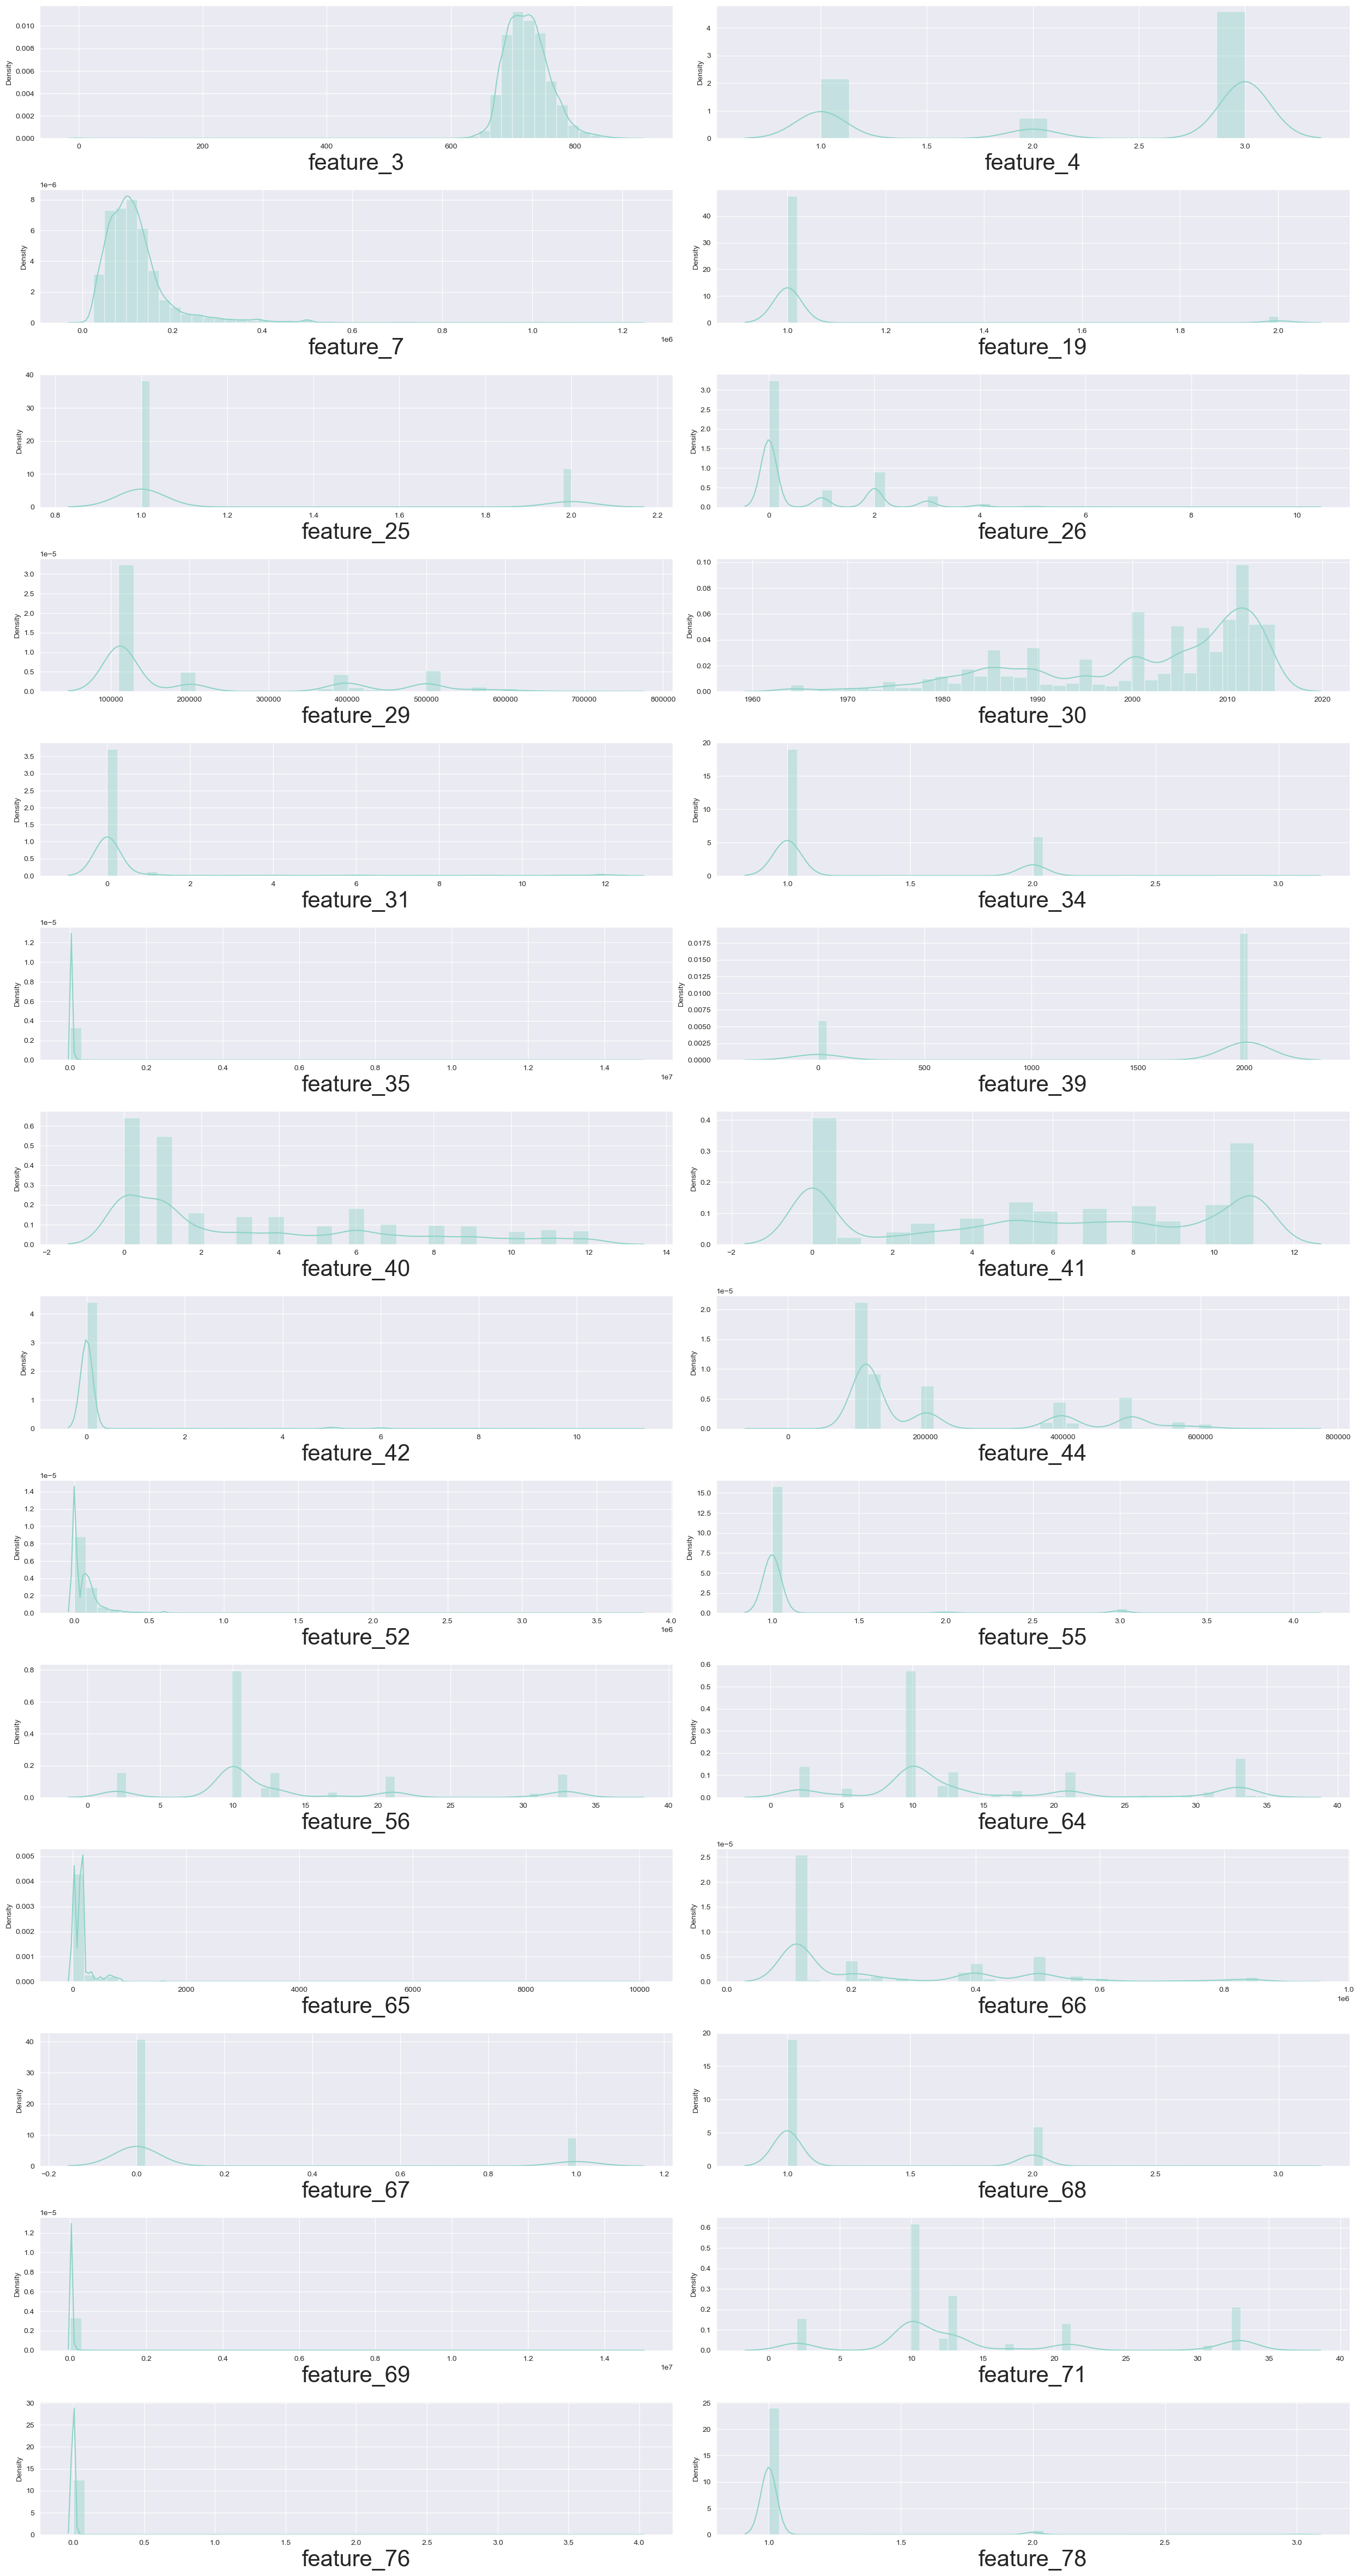

In [19]:
numerical_data = data[['feature_3','feature_4','feature_7','feature_19','feature_25','feature_26','feature_29','feature_30',
'feature_31','feature_34','feature_35','feature_39','feature_40','feature_41','feature_42','feature_44','feature_52',
'feature_55','feature_56','feature_64','feature_65','feature_66','feature_67','feature_68','feature_69','feature_71','feature_76',
'feature_78']]


sns.set_style('darkgrid')
plt.figure(figsize=(25,50)) # defining canvas size
plotnum = 1 # counter

for column in numerical_data: # iteration of columns / acessing the columns from  dataset 
    if plotnum<=30:    # set the limit
        plt.subplot(15,2,plotnum) # # plotting 28 graphs (3-rows,2-columns) And plotnumber is for count
        sns.distplot(x=numerical_data[column]) # Plotting distribution plots 
        plt.xlabel(column,fontsize=30)  # assigning name to x-axis and font size is 30
      
    plotnum+=1 # counter increment
plt.tight_layout()
plt.show()

* Impute missing value using median because disribution is not normal.

In [21]:
numerical_data.columns

Index(['feature_3', 'feature_4', 'feature_7', 'feature_19', 'feature_25',
       'feature_26', 'feature_29', 'feature_30', 'feature_31', 'feature_34',
       'feature_35', 'feature_39', 'feature_40', 'feature_41', 'feature_42',
       'feature_44', 'feature_52', 'feature_55', 'feature_56', 'feature_64',
       'feature_65', 'feature_66', 'feature_67', 'feature_68', 'feature_69',
       'feature_71', 'feature_76', 'feature_78'],
      dtype='object')

In [22]:
data[numerical_data.columns] = data[numerical_data.columns].fillna(data[numerical_data.columns].median())

In [23]:
#Create function to check missing value with percentage
def missing_value(data):
    null_value = data.isnull().sum()
    percentage = (data.isnull().sum()/data.isnull().count()*100)
    null_value = pd.concat([null_value,percentage],axis=1,keys=['Missing Number','Missing Percentage'])
    return null_value
missing_value(data)

Missing Number  Missing Percentage
Unnamed: 0                    0            0.000000
dt_opened                     0            0.000000
customer_no                   0            0.000000
entry_time                   15            0.062772
feature_1                    15            0.062772
feature_2                  2836           11.868095
feature_3                     0            0.000000
feature_4                     0            0.000000
feature_5                    15            0.062772
feature_7                     0            0.000000
feature_11                   15            0.062772
feature_12                   15            0.062772
feature_15                   23            0.096250
feature_16                   27            0.112990
feature_19                    0            0.000000
feature_20                    0            0.000000
feature_21                   15            0.062772
feature_22                    0            0.000000
feature_23                   15            0.062772
feature_24                  640            2.678273
feature_25                    0            0.000000
feature_26                    0            0.000000
feature_27                 3637           15.220121
feature_28                   15            0.062772
feature_29                    0            0.000000
feature_30                    0            0.000000
feature_31                    0            0.000000
feature_32                   15            0.062772
feature_33                   15            0.062772
feature_34                    0            0.000000
feature_35                    0            0.000000
feature_36                 5682           23.778038
feature_37                 5682           23.778038
feature_39                    0            0.000000
feature_40                    0            0.000000
feature_41                    0            0.000000
feature_42                    0            0.000000
feature_43                   15            0.062772
feature_44                    0            0.000000
feature_46                   94            0.393371
feature_47                    0            0.000000
feature_48                18399           76.996150
feature_50                   15            0.062772
feature_52                    0            0.000000
feature_54                   15            0.062772
feature_55                    0            0.000000
feature_56                    0            0.000000
feature_58                   15            0.062772
feature_59                   15            0.062772
feature_60                   15            0.062772
feature_62                   15            0.062772
feature_63                   15            0.062772
feature_64                    0            0.000000
feature_65                    0            0.000000
feature_66                    0            0.000000
feature_67                    0            0.000000
feature_68                    0            0.000000
feature_69                    0            0.000000
feature_70                   15            0.062772
feature_71                    0            0.000000
feature_72                   15            0.062772
feature_75                   15            0.062772
feature_76                    0            0.000000
feature_77                    0            0.000000
feature_78                    0            0.000000
feature_79                   15            0.062772
Bad_label                     0            0.000000
high_credit_amt              13            0.054402
cur_balance_amt               0            0.000000
cashlimit                  5461           22.853197
creditlimit                4024           16.839638
customer_no.1                 0            0.000000
total_enq_count               0            0.000000
total_enq_amt                 0            0.000000

**Categorical :-**
* mode(use fillna function to impute categorical value)

In [39]:
categorical_data = data[['entry_time','feature_1', 'feature_2', 'feature_5', 'feature_11','feature_12',
                         'feature_15','feature_16','feature_21','feature_23','feature_24','feature_27',
                         'feature_28','feature_32','feature_33','feature_36','feature_37','feature_43',
                         'feature_46','feature_48','feature_50','feature_54','feature_58','feature_59',
                         'feature_60','feature_62','feature_63','feature_70','feature_72','feature_75',
                         'feature_79','high_credit_amt','cashlimit','creditlimit']]

In [25]:
categorical_data.columns

Index(['feature_1', 'feature_2', 'feature_5', 'feature_11', 'feature_12',
       'feature_15', 'feature_16', 'feature_21', 'feature_23', 'feature_24',
       'feature_27', 'feature_28', 'feature_32', 'feature_33', 'feature_36',
       'feature_37', 'feature_43', 'feature_46', 'feature_48', 'feature_50',
       'feature_54', 'feature_58', 'feature_59', 'feature_60', 'feature_62',
       'feature_63', 'feature_70', 'feature_72', 'feature_75', 'feature_79',
       'high_credit_amt', 'cashlimit', 'creditlimit'],
      dtype='object')

In [29]:
data['entry_time'] = data['entry_time'].fillna(data['entry_time'].mode()[0])
data['feature_1'] = data['feature_1'].fillna(data['feature_1'].mode()[0])
data['feature_2'] = data['feature_2'].fillna(data['feature_2'].mode()[0])
data['feature_5'] = data['feature_5'].fillna(data['feature_5'].mode()[0])
data['feature_11'] = data['feature_11'].fillna(data['feature_11'].mode()[0])
data['feature_12'] = data['feature_12'].fillna(data['feature_12'].mode()[0])
data['feature_15'] = data['feature_15'].fillna(data['feature_15'].mode()[0])
data['feature_16'] = data['feature_16'].fillna(data['feature_16'].mode()[0])
data['feature_21'] = data['feature_21'].fillna(data['feature_21'].mode()[0])
data['feature_23'] = data['feature_23'].fillna(data['feature_23'].mode()[0])
data['feature_24'] = data['feature_24'].fillna(data['feature_24'].mode()[0])
data['feature_27'] = data['feature_27'].fillna(data['feature_27'].mode()[0])
data['feature_28'] = data['feature_28'].fillna(data['feature_28'].mode()[0])
data['feature_32'] = data['feature_32'].fillna(data['feature_32'].mode()[0])
data['feature_33'] = data['feature_33'].fillna(data['feature_33'].mode()[0])
data['feature_36'] = data['feature_36'].fillna(data['feature_36'].mode()[0])
data['feature_37'] = data['feature_37'].fillna(data['feature_37'].mode()[0])
data['feature_43'] = data['feature_43'].fillna(data['feature_43'].mode()[0])
data['feature_46'] = data['feature_46'].fillna(data['feature_46'].mode()[0])
data['feature_48'] = data['feature_48'].fillna(data['feature_48'].mode()[0])
data['feature_50'] = data['feature_50'].fillna(data['feature_50'].mode()[0])
data['feature_54'] = data['feature_54'].fillna(data['feature_54'].mode()[0])
data['feature_58'] = data['feature_58'].fillna(data['feature_58'].mode()[0])
data['feature_59'] = data['feature_59'].fillna(data['feature_59'].mode()[0])
data['feature_60'] = data['feature_60'].fillna(data['feature_60'].mode()[0])
data['feature_62'] = data['feature_62'].fillna(data['feature_62'].mode()[0])
data['feature_63'] = data['feature_63'].fillna(data['feature_63'].mode()[0])
data['feature_70'] = data['feature_70'].fillna(data['feature_70'].mode()[0])
data['feature_72'] = data['feature_72'].fillna(data['feature_72'].mode()[0])
data['feature_75'] = data['feature_75'].fillna(data['feature_75'].mode()[0])
data['feature_79'] = data['feature_79'].fillna(data['feature_79'].mode()[0])
data['high_credit_amt'] = data['high_credit_amt'].fillna(data['high_credit_amt'].mode()[0])
data['cashlimit'] = data['cashlimit'].fillna(data['cashlimit'].mode()[0])
data['creditlimit'] = data['creditlimit'].fillna(data['creditlimit'].mode()[0])


In [30]:
#Create function to check missing value with percentage
def missing_value(data):
    null_value = data.isnull().sum()
    percentage = (data.isnull().sum()/data.isnull().count()*100)
    null_value = pd.concat([null_value,percentage],axis=1,keys=['Missing Number','Missing Percentage'])
    return null_value
missing_value(data)

Missing Number  Missing Percentage
Unnamed: 0                    0                 0.0
dt_opened                     0                 0.0
customer_no                   0                 0.0
entry_time                    0                 0.0
feature_1                     0                 0.0
feature_2                     0                 0.0
feature_3                     0                 0.0
feature_4                     0                 0.0
feature_5                     0                 0.0
feature_7                     0                 0.0
feature_11                    0                 0.0
feature_12                    0                 0.0
feature_15                    0                 0.0
feature_16                    0                 0.0
feature_19                    0                 0.0
feature_20                    0                 0.0
feature_21                    0                 0.0
feature_22                    0                 0.0
feature_23                    0                 0.0
feature_24                    0                 0.0
feature_25                    0                 0.0
feature_26                    0                 0.0
feature_27                    0                 0.0
feature_28                    0                 0.0
feature_29                    0                 0.0
feature_30                    0                 0.0
feature_31                    0                 0.0
feature_32                    0                 0.0
feature_33                    0                 0.0
feature_34                    0                 0.0
feature_35                    0                 0.0
feature_36                    0                 0.0
feature_37                    0                 0.0
feature_39                    0                 0.0
feature_40                    0                 0.0
feature_41                    0                 0.0
feature_42                    0                 0.0
feature_43                    0                 0.0
feature_44                    0                 0.0
feature_46                    0                 0.0
feature_47                    0                 0.0
feature_48                    0                 0.0
feature_50                    0                 0.0
feature_52                    0                 0.0
feature_54                    0                 0.0
feature_55                    0                 0.0
feature_56                    0                 0.0
feature_58                    0                 0.0
feature_59                    0                 0.0
feature_60                    0                 0.0
feature_62                    0                 0.0
feature_63                    0                 0.0
feature_64                    0                 0.0
feature_65                    0                 0.0
feature_66                    0                 0.0
feature_67                    0                 0.0
feature_68                    0                 0.0
feature_69                    0                 0.0
feature_70                    0                 0.0
feature_71                    0                 0.0
feature_72                    0                 0.0
feature_75                    0                 0.0
feature_76                    0                 0.0
feature_77                    0                 0.0
feature_78                    0                 0.0
feature_79                    0                 0.0
Bad_label                     0                 0.0
high_credit_amt               0                 0.0
cur_balance_amt               0                 0.0
cashlimit                     0                 0.0
creditlimit                   0                 0.0
customer_no.1                 0                 0.0
total_enq_count               0                 0.0
total_enq_amt                 0                 0.0

## Convert Categorical To Numerical :-

**Labal Encoding :-**
* categorical feature convert into numerical

In [31]:
data.head()

Unnamed: 0 dt_opened  customer_no entry_time feature_1 feature_2  \
0           0   18Apr15            1    13Apr15  Insignia   13Apr15   
1           1   21Apr15            2    21Apr15  Insignia   21Apr15   
2           2   22Apr15            3    21Apr15  Insignia   21Apr15   
3           3   25Apr15            4    15Apr15  Insignia   20Apr15   
4           4   06May15            5    30Apr15  Insignia   19Oct15   

   feature_3  feature_4   feature_5  feature_7 feature_11 feature_12  \
0      650.0        2.0  Card Setup   500000.0          Y        IS1   
1      760.0        1.0  Card Setup  1200000.0          Y        IS1   
2      774.0        1.0  Card Setup   700000.0          Y        IS1   
3      770.0        1.0  Card Setup   500000.0          Y        IS1   
4      721.0        3.0  Card Setup   500000.0          Y        IS1   

  feature_15 feature_16  feature_19  feature_20 feature_21  feature_22  \
0        159       4284         1.0  ADFPNXXXXX    03Sep65  98332XXXXX   
1         91       B001         1.0  AJWPRXXXXX    14Jul62  99455XXXXX   
2         91       B001         2.0  AFAPNXXXXX    10Apr66  98456XXXXX   
3        157       5107         1.0  AAAPDXXXXX    16Apr64  98220XXXXX   
4        100       D016         1.0  ABEPSXXXXX    03Jan54  98111XXXXX   

  feature_23       feature_24  feature_25  feature_26 feature_27  \
0          N    REDIFFMAILCOM         1.0         2.0   Graduate   
1          N         GMAILCOM         1.0         2.0   Graduate   
2          N  SHOBANARAYANCOM         1.0         0.0   Graduate   
3          N          VSNLCOM         1.0         3.0   Graduate   
4          N    REDIFFMAILCOM         1.0         3.0   Graduate   

                   feature_28  feature_29  feature_30  feature_31 feature_32  \
0  Mumbai  Navi Mumbai  Thane    400610.0      1965.0         0.0       Self   
1                   Bengaluru    560042.0      1969.0         0.0       Self   
2                   Bengaluru    560042.0      1966.0         0.0       Self   
3                        Pune    411001.0      1988.0         0.0       Self   
4                     Gurgaon    122009.0      1995.0         0.0       Self   

  feature_33  feature_34  feature_35      feature_36  \
0          Y         2.0     90000.0  Private Ltd Co   
1          Y         2.0         1.0  Private Ltd Co   
2          Y         2.0         1.0  Private Ltd Co   
3          Y         2.0    100000.0  Private Ltd Co   
4          Y         2.0    300000.0  Private Ltd Co   

                  feature_37  feature_39  feature_40  feature_41  feature_42  \
0  BankingFinancial Services         0.0         0.0         0.0         0.0   
1  BankingFinancial Services         0.0         0.0         0.0         0.0   
2  BankingFinancial Services         0.0         0.0         0.0         0.0   
3  BankingFinancial Services         0.0         0.0         0.0         0.0   
4  BankingFinancial Services         0.0         0.0         0.0         0.0   

  feature_43  feature_44 feature_46  feature_47             feature_48  \
0     Mumbai    400059.0   PAN Card  ADFPNXXXXX  The Ratnakar Bank Ltd   
1  Bangalore    560042.0   PAN Card  AJWPRXXXXX  The Ratnakar Bank Ltd   
2  Bangalore    560042.0   PAN Card  AFAPNXXXXX              HDFC Bank   
3       Pune    411026.0   PAN Card  AAAPDXXXXX  The Ratnakar Bank Ltd   
4    Gurgaon    122009.0   PAN Card  ABEPSXXXXX  The Ratnakar Bank Ltd   

  feature_50  feature_52 feature_54  feature_55  feature_56 feature_58  \
0          Y         0.0    17Jun16         1.0        21.0          Y   
1          N         0.0    17Jun16         1.0        17.0          Y   
2          N         0.0    17Jun16         3.0        17.0          N   
3          Y         0.0    17Jun16         1.0        21.0          Y   
4          N         0.0    17Jun16         1.0        13.0          Y   

  feature_59 feature_60 feature_62 feature_63  feature_64  feature_65  \
0          Y          N    

In [40]:
categorical_data.columns

Index(['entry_time', 'feature_1', 'feature_2', 'feature_5', 'feature_11',
       'feature_12', 'feature_15', 'feature_16', 'feature_21', 'feature_23',
       'feature_24', 'feature_27', 'feature_28', 'feature_32', 'feature_33',
       'feature_36', 'feature_37', 'feature_43', 'feature_46', 'feature_48',
       'feature_50', 'feature_54', 'feature_58', 'feature_59', 'feature_60',
       'feature_62', 'feature_63', 'feature_70', 'feature_72', 'feature_75',
       'feature_79', 'high_credit_amt', 'cashlimit', 'creditlimit'],
      dtype='object')

In [41]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
data.entry_time=label.fit_transform(data.entry_time)
data.feature_1=label.fit_transform(data.feature_1)
data.feature_2=label.fit_transform(data.feature_2)
data.feature_5=label.fit_transform(data.feature_5)
data.feature_11=label.fit_transform(data.feature_11)
data.feature_12=label.fit_transform(data.feature_12)
data.feature_15=label.fit_transform(data.feature_15)
data.feature_16=label.fit_transform(data.feature_16)
data.feature_21=label.fit_transform(data.feature_21)
data.feature_23=label.fit_transform(data.feature_23)
data.feature_24=label.fit_transform(data.feature_24)
data.feature_27=label.fit_transform(data.feature_27)
data.feature_28=label.fit_transform(data.feature_28)
data.feature_32=label.fit_transform(data.feature_32)
data.feature_33=label.fit_transform(data.feature_33)
data.feature_36=label.fit_transform(data.feature_36)
data.feature_37=label.fit_transform(data.feature_37)
data.feature_43=label.fit_transform(data.feature_43)
data.feature_46=label.fit_transform(data.feature_46)
data.feature_48=label.fit_transform(data.feature_48)
data.feature_50=label.fit_transform(data.feature_50)
data.feature_54=label.fit_transform(data.feature_54)
data.feature_58=label.fit_transform(data.feature_58)
data.feature_59=label.fit_transform(data.feature_59)
data.feature_60=label.fit_transform(data.feature_60)
data.feature_62=label.fit_transform(data.feature_62)
data.feature_63=label.fit_transform(data.feature_63)
data.feature_70=label.fit_transform(data.feature_70)
data.feature_72=label.fit_transform(data.feature_72)
data.feature_75=label.fit_transform(data.feature_75)
data.feature_79=label.fit_transform(data.feature_79)
data.high_credit_amt=label.fit_transform(data.high_credit_amt)
data.creditlimit=label.fit_transform(data.creditlimit)
data.cashlimit=label.fit_transform(data.cashlimit)
data.cur_balance_amt=label.fit_transform(data.cur_balance_amt)

In [42]:
data.head()

Unnamed: 0 dt_opened  customer_no  entry_time  feature_1  feature_2  \
0           0   18Apr15            1         116          1        108   
1           1   21Apr15            2         198          1        186   
2           2   22Apr15            3         198          1        186   
3           3   25Apr15            4         138          1        177   
4           4   06May15            5         282          1        175   

   feature_3  feature_4  feature_5  feature_7  feature_11  feature_12  \
0      650.0        2.0          0   500000.0           1           3   
1      760.0        1.0          0  1200000.0           1           3   
2      774.0        1.0          0   700000.0           1           3   
3      770.0        1.0          0   500000.0           1           3   
4      721.0        3.0          0   500000.0           1           3   

   feature_15  feature_16  feature_19  feature_20  feature_21  feature_22  \
0          25          41         1.0  ADFPNXXXXX         936  98332XXXXX   
1          85         146         1.0  AJWPRXXXXX        3966  99455XXXXX   
2          85         146         2.0  AFAPNXXXXX        2676  98456XXXXX   
3          23          56         1.0  AAAPDXXXXX        4468  98220XXXXX   
4           2         183         1.0  ABEPSXXXXX         763  98111XXXXX   

   feature_23  feature_24  feature_25  feature_26  feature_27  feature_28  \
0           0         467         1.0         2.0           5          39   
1           0         193         1.0         2.0           5           9   
2           0         505         1.0         0.0           5           9   
3           0         595         1.0         3.0           5          45   
4           0         467         1.0         3.0           5          23   

   feature_29  feature_30  feature_31  feature_32  feature_33  feature_34  \
0    400610.0      1965.0         0.0           4           1         2.0   
1    560042.0      1969.0         0.0           4           1         2.0   
2    560042.0      1966.0         0.0           4           1         2.0   
3    411001.0      1988.0         0.0           4           1         2.0   
4    122009.0      1995.0         0.0           4           1         2.0   

   feature_35  feature_36  feature_37  feature_39  feature_40  feature_41  \
0     90000.0           6           1         0.0         0.0         0.0   
1         1.0           6           1         0.0         0.0         0.0   
2         1.0           6           1         0.0         0.0         0.0   
3    100000.0           6           1         0.0         0.0         0.0   
4    300000.0           6           1         0.0         0.0         0.0   

   feature_42  feature_43  feature_44  feature_46  feature_47  feature_48  \
0         0.0          43    400059.0           2  ADFPNXXXXX          50   
1         0.0           6    560042.0           2  AJWPRXXXXX          50   
2         0.0           6    560042.0           2  AFAPNXXXXX          19   
3         0.0          51    411026.0           2  AAAPDXXXXX          50   
4         0.0          28    122009.0           2  ABEPSXXXXX          50   

   feature_50  feature_52  feature_54  feature_55  feature_56  feature_58  \
0           1         0.0           0         1.0        21.0           1   
1           0         0.0           0         1.0        17.0           1   
2           0         0.0           0         3.0        17.0           0   
3           1         0.0           0         1.0        21.0           1   
4           0         0.0           0         1.0        13.0           1   

   feature_59  feature_60  feature_62  feature_63  feature_64  feature_65  \
0           1           0           1           1        21.0        15.0   
1           1           0           1          13        17.0        12.0   
2           1           0           1           4        17.0        12.0   
3           1           0        

## Outlier Handling :-

In [43]:
len(data.columns)

74

In [44]:
data_2 = data[['entry_time', 'feature_1',
       'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_7',
       'feature_11', 'feature_12', 'feature_15', 'feature_16', 'feature_19',
       'feature_21', 'feature_23', 'feature_24',
       'feature_25', 'feature_26', 'feature_27', 'feature_28', 'feature_29',
       'feature_30', 'feature_31', 'feature_32', 'feature_33', 'feature_34',
       'feature_35', 'feature_36', 'feature_37', 'feature_39', 'feature_40',
       'feature_41', 'feature_42', 'feature_43', 'feature_44', 'feature_46',
       'feature_48', 'feature_50', 'feature_52', 'feature_54',
       'feature_55', 'feature_56', 'feature_58', 'feature_59', 'feature_60',
       'feature_62', 'feature_63', 'feature_64', 'feature_65', 'feature_66',
       'feature_67', 'feature_68', 'feature_69', 'feature_70', 'feature_71',
       'feature_72', 'feature_75', 'feature_76', 'feature_78',
       'feature_79','high_credit_amt', 'cur_balance_amt',
       'cashlimit', 'creditlimit', 'customer_no.1', 'total_enq_count',
       'total_enq_amt']]

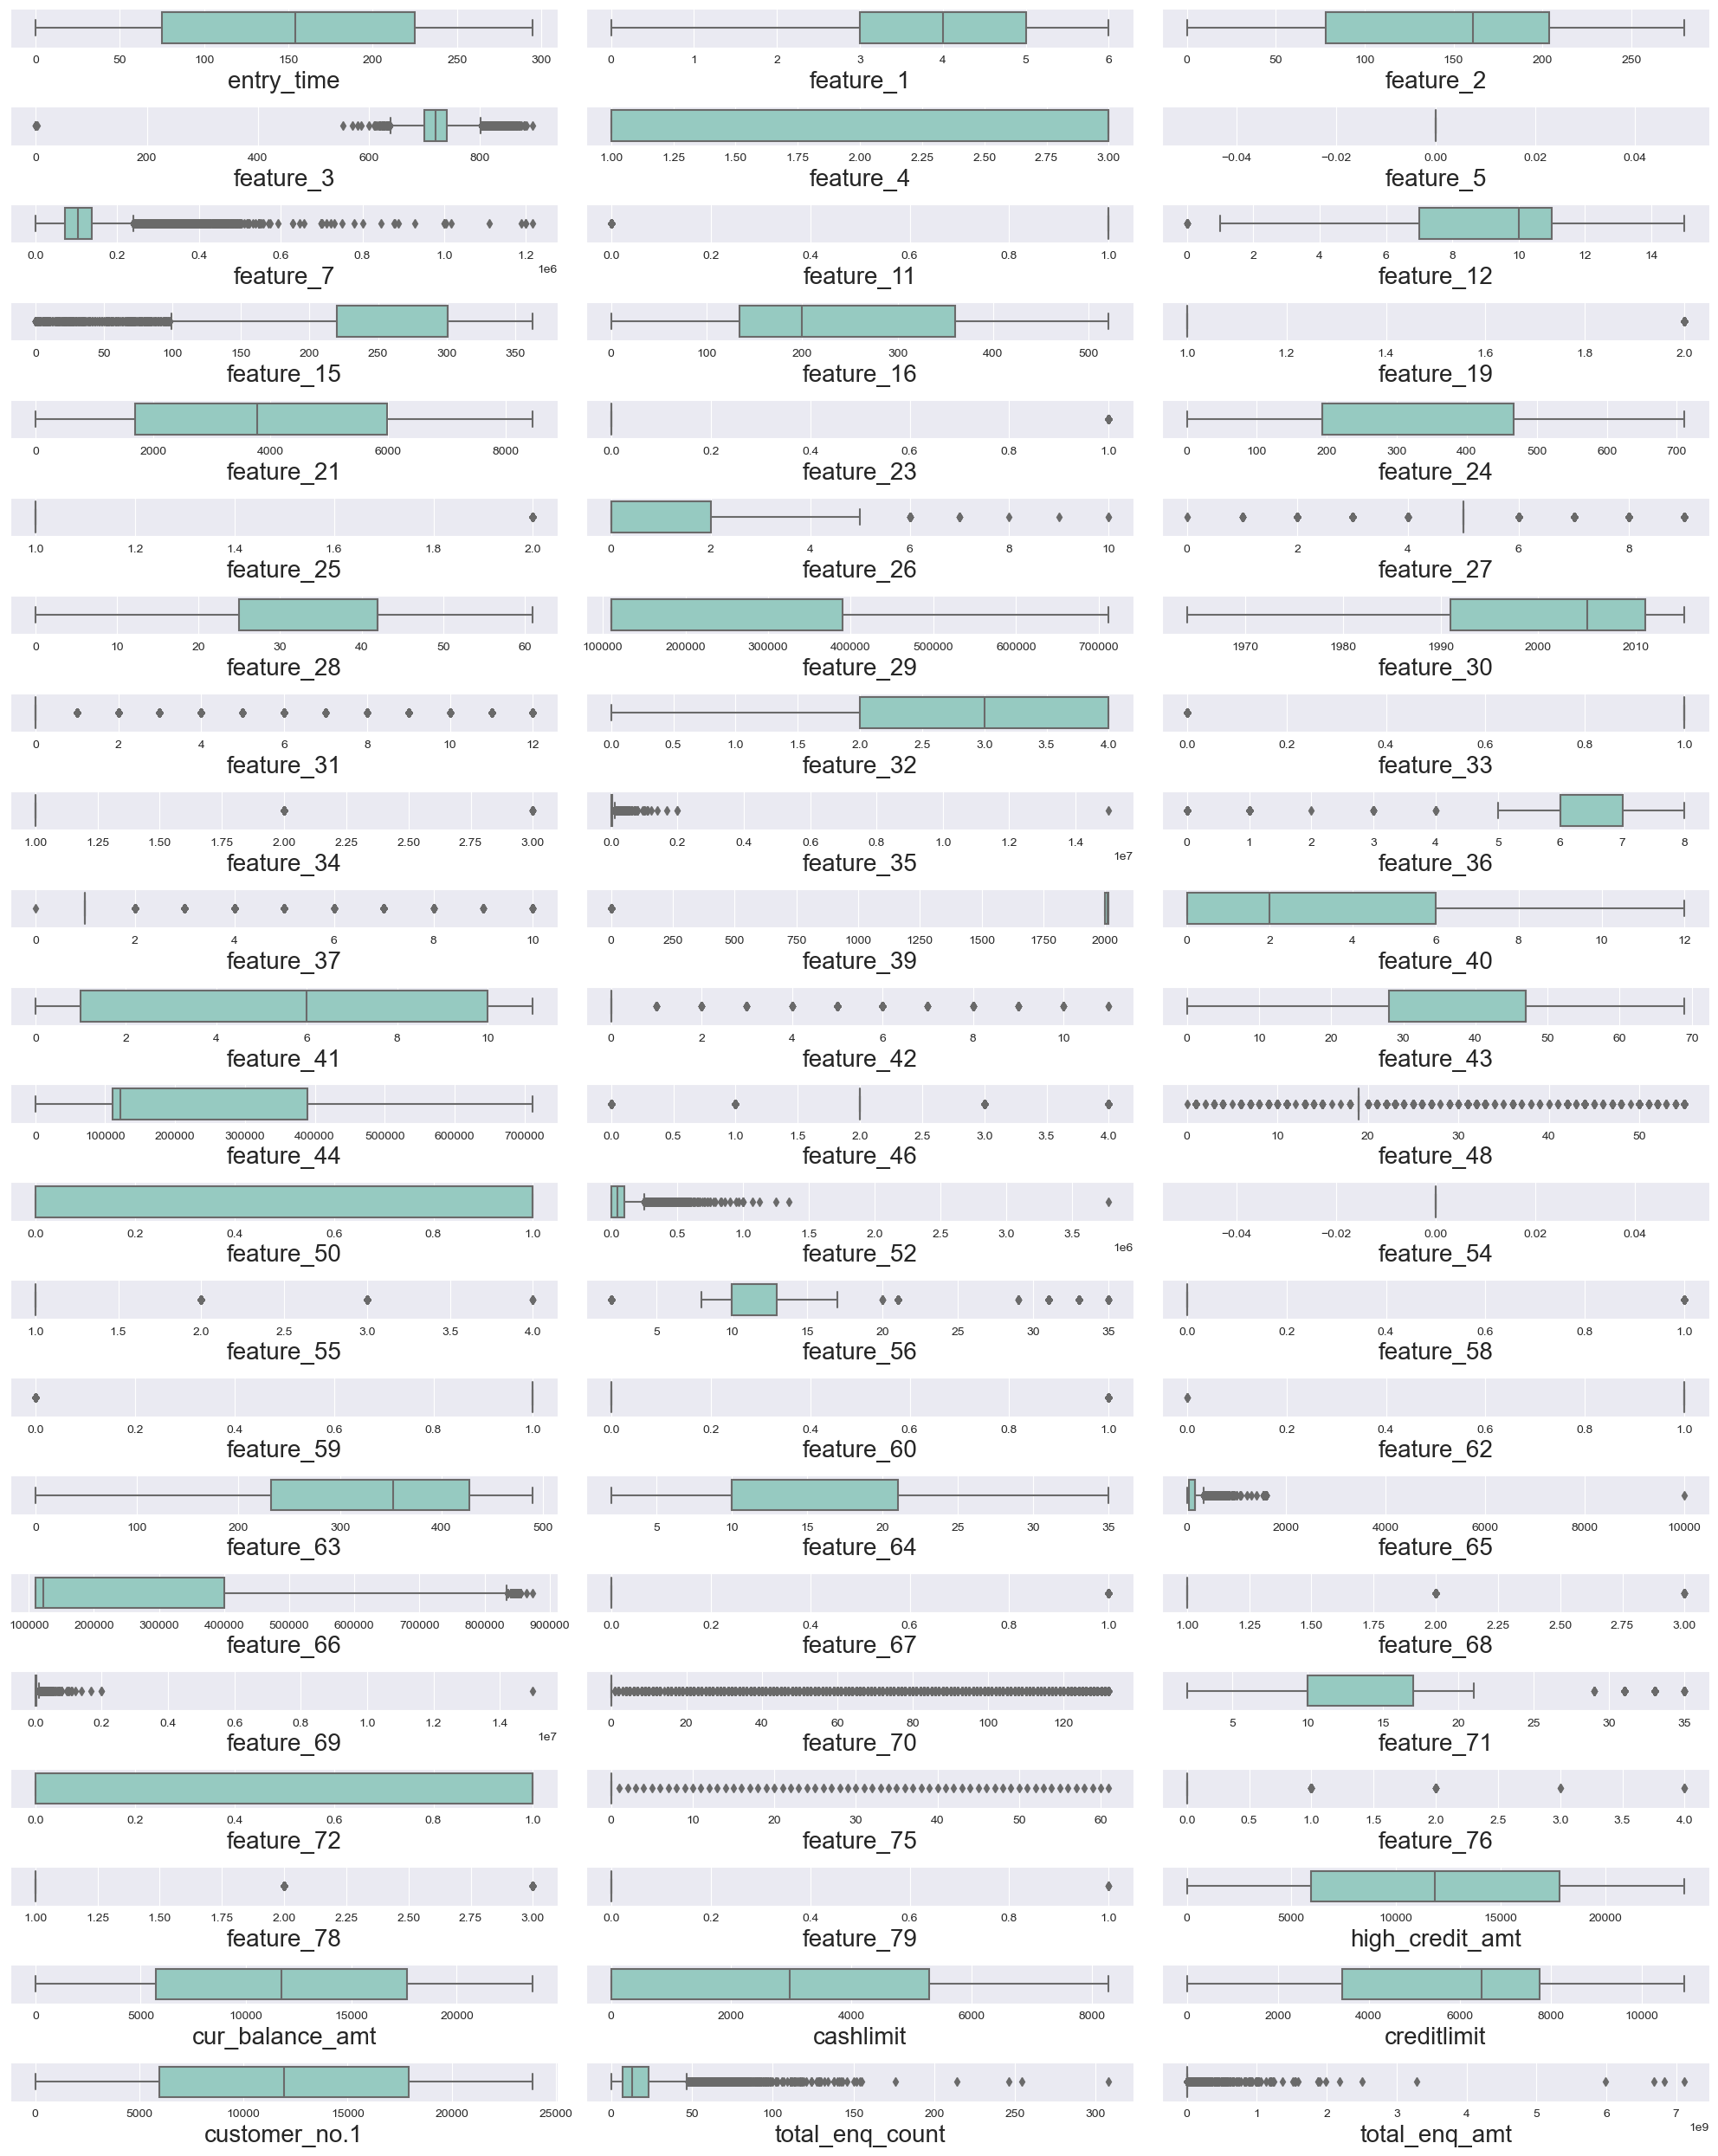

In [47]:
plt.figure(figsize=(20,25)) # defining canvas size
plotnum = 1 # counter

for column in data_2: # iteration of columns / acessing the columns from  dataset 
    if plotnum<=70:    # set the limit
        plt.subplot(22,3,plotnum) # # plotting  graphs (5-rows,3-columns) and plotnumber is for count
        sns.boxplot(x = data[column]) # Plotting box plots 
        plt.xlabel(column,fontsize=20)  # assigning name to x-axis and font size is 20
    plotnum+=1 # counter increment
plt.tight_layout()
plt.show() # used to hide the storage loction

* From the above EDA we seen the feature are private information.
* Not impute the outlier we are scaling to robust the outlier

##  Feature Scaling :-

**Robust Scaler :-**
* Robust scaler are robust to outlier. it is used to sacled the feature to median and quantile scaling

In [48]:
data.head()

Unnamed: 0 dt_opened  customer_no  entry_time  feature_1  feature_2  \
0           0   18Apr15            1         116          1        108   
1           1   21Apr15            2         198          1        186   
2           2   22Apr15            3         198          1        186   
3           3   25Apr15            4         138          1        177   
4           4   06May15            5         282          1        175   

   feature_3  feature_4  feature_5  feature_7  feature_11  feature_12  \
0      650.0        2.0          0   500000.0           1           3   
1      760.0        1.0          0  1200000.0           1           3   
2      774.0        1.0          0   700000.0           1           3   
3      770.0        1.0          0   500000.0           1           3   
4      721.0        3.0          0   500000.0           1           3   

   feature_15  feature_16  feature_19  feature_20  feature_21  feature_22  \
0          25          41         1.0  ADFPNXXXXX         936  98332XXXXX   
1          85         146         1.0  AJWPRXXXXX        3966  99455XXXXX   
2          85         146         2.0  AFAPNXXXXX        2676  98456XXXXX   
3          23          56         1.0  AAAPDXXXXX        4468  98220XXXXX   
4           2         183         1.0  ABEPSXXXXX         763  98111XXXXX   

   feature_23  feature_24  feature_25  feature_26  feature_27  feature_28  \
0           0         467         1.0         2.0           5          39   
1           0         193         1.0         2.0           5           9   
2           0         505         1.0         0.0           5           9   
3           0         595         1.0         3.0           5          45   
4           0         467         1.0         3.0           5          23   

   feature_29  feature_30  feature_31  feature_32  feature_33  feature_34  \
0    400610.0      1965.0         0.0           4           1         2.0   
1    560042.0      1969.0         0.0           4           1         2.0   
2    560042.0      1966.0         0.0           4           1         2.0   
3    411001.0      1988.0         0.0           4           1         2.0   
4    122009.0      1995.0         0.0           4           1         2.0   

   feature_35  feature_36  feature_37  feature_39  feature_40  feature_41  \
0     90000.0           6           1         0.0         0.0         0.0   
1         1.0           6           1         0.0         0.0         0.0   
2         1.0           6           1         0.0         0.0         0.0   
3    100000.0           6           1         0.0         0.0         0.0   
4    300000.0           6           1         0.0         0.0         0.0   

   feature_42  feature_43  feature_44  feature_46  feature_47  feature_48  \
0         0.0          43    400059.0           2  ADFPNXXXXX          50   
1         0.0           6    560042.0           2  AJWPRXXXXX          50   
2         0.0           6    560042.0           2  AFAPNXXXXX          19   
3         0.0          51    411026.0           2  AAAPDXXXXX          50   
4         0.0          28    122009.0           2  ABEPSXXXXX          50   

   feature_50  feature_52  feature_54  feature_55  feature_56  feature_58  \
0           1         0.0           0         1.0        21.0           1   
1           0         0.0           0         1.0        17.0           1   
2           0         0.0           0         3.0        17.0           0   
3           1         0.0           0         1.0        21.0           1   
4           0         0.0           0         1.0        13.0           1   

   feature_59  feature_60  feature_62  feature_63  feature_64  feature_65  \
0           1           0           1           1        21.0        15.0   
1           1           0           1          13        17.0        12.0   
2           1           0           1           4        17.0        12.0   
3           1           0        

In [50]:
# 3.Robust scalar
from sklearn.preprocessing import RobustScaler
scale = RobustScaler()
data[data_2.columns]=scale.fit_transform(data[data_2.columns])



In [51]:
data.head()

Unnamed: 0 dt_opened  customer_no  entry_time  feature_1  feature_2  \
0           0   18Apr15            1   -0.253333       -1.5  -0.420635   
1           1   21Apr15            2    0.293333       -1.5   0.198413   
2           2   22Apr15            3    0.293333       -1.5   0.198413   
3           3   25Apr15            4   -0.106667       -1.5   0.126984   
4           4   06May15            5    0.853333       -1.5   0.111111   

   feature_3  feature_4  feature_5  feature_7  feature_11  feature_12  \
0  -1.731707       -0.5        0.0   5.910448         0.0       -1.75   
1   0.951220       -1.0        0.0  16.358209         0.0       -1.75   
2   1.292683       -1.0        0.0   8.895522         0.0       -1.75   
3   1.195122       -1.0        0.0   5.910448         0.0       -1.75   
4   0.000000        0.0        0.0   5.910448         0.0       -1.75   

   feature_15  feature_16  feature_19  feature_20  feature_21  feature_22  \
0   -3.407407   -0.703540         0.0  ADFPNXXXXX   -0.663823  98332XXXXX   
1   -2.666667   -0.238938         0.0  AJWPRXXXXX    0.044411  99455XXXXX   
2   -2.666667   -0.238938         1.0  AFAPNXXXXX   -0.257114  98456XXXXX   
3   -3.432099   -0.637168         0.0  AAAPDXXXXX    0.161748  98220XXXXX   
4   -3.691358   -0.075221         0.0  ABEPSXXXXX   -0.704260  98111XXXXX   

   feature_23  feature_24  feature_25  feature_26  feature_27  feature_28  \
0         0.0    1.000000         0.0         1.0         0.0   -0.176471   
1         0.0    0.000000         0.0         1.0         0.0   -1.941176   
2         0.0    1.138686         0.0         0.0         0.0   -1.941176   
3         0.0    1.467153         0.0         1.5         0.0    0.176471   
4         0.0    1.000000         0.0         1.5         0.0   -1.117647   

   feature_29  feature_30  feature_31  feature_32  feature_33  feature_34  \
0    1.037739       -2.00         0.0         0.5         0.0         1.0   
1    1.607238       -1.80         0.0         0.5         0.0         1.0   
2    1.607238       -1.95         0.0         0.5         0.0         1.0   
3    1.074856       -0.85         0.0         0.5         0.0         1.0   
4    0.042561       -0.50         0.0         0.5         0.0         1.0   

   feature_35  feature_36  feature_37  feature_39  feature_40  feature_41  \
0    1.395381         0.0         0.0 -143.571429   -0.333333   -0.666667   
1   -0.697667         0.0         0.0 -143.571429   -0.333333   -0.666667   
2   -0.697667         0.0         0.0 -143.571429   -0.333333   -0.666667   
3    1.627945         0.0         0.0 -143.571429   -0.333333   -0.666667   
4    6.279216         0.0         0.0 -143.571429   -0.333333   -0.666667   

   feature_42  feature_43  feature_44  feature_46  feature_47  feature_48  \
0         0.0   -0.210526    0.993213         0.0  ADFPNXXXXX        31.0   
1         0.0   -2.157895    1.564667         0.0  AJWPRXXXXX        31.0   
2         0.0   -2.157895    1.564667         0.0  AFAPNXXXXX         0.0   
3         0.0    0.210526    1.032387         0.0  AAAPDXXXXX        31.0   
4         0.0   -1.000000    0.000029         0.0  ABEPSXXXXX        31.0   

   feature_50  feature_52  feature_54  feature_55  feature_56  feature_58  \
0         0.0        -0.5         0.0         0.0    3.666667         1.0   
1        -1.0        -0.5         0.0         0.0    2.333333         1.0   
2        -1.0        -0.5         0.0         2.0    2.333333         0.0   
3         0.0        -0.5         0.0         0.0    3.666667         1.0   
4        -1.0        -0.5         0.0         0.0    1.000000         1.0   

   feature_59  feature_60  feature_62  feature_63  feature_64  feature_65  \
0         0.0         0.0         0.0   -1.797695    1.000000   -1.203390   
1         0.0         0.0         0.0   -1.736236    0.636364   -1.228814   
2         0.0         0.0         0.0   -1.782330    0.636364   -1.228814   
3         0.0         0.0        

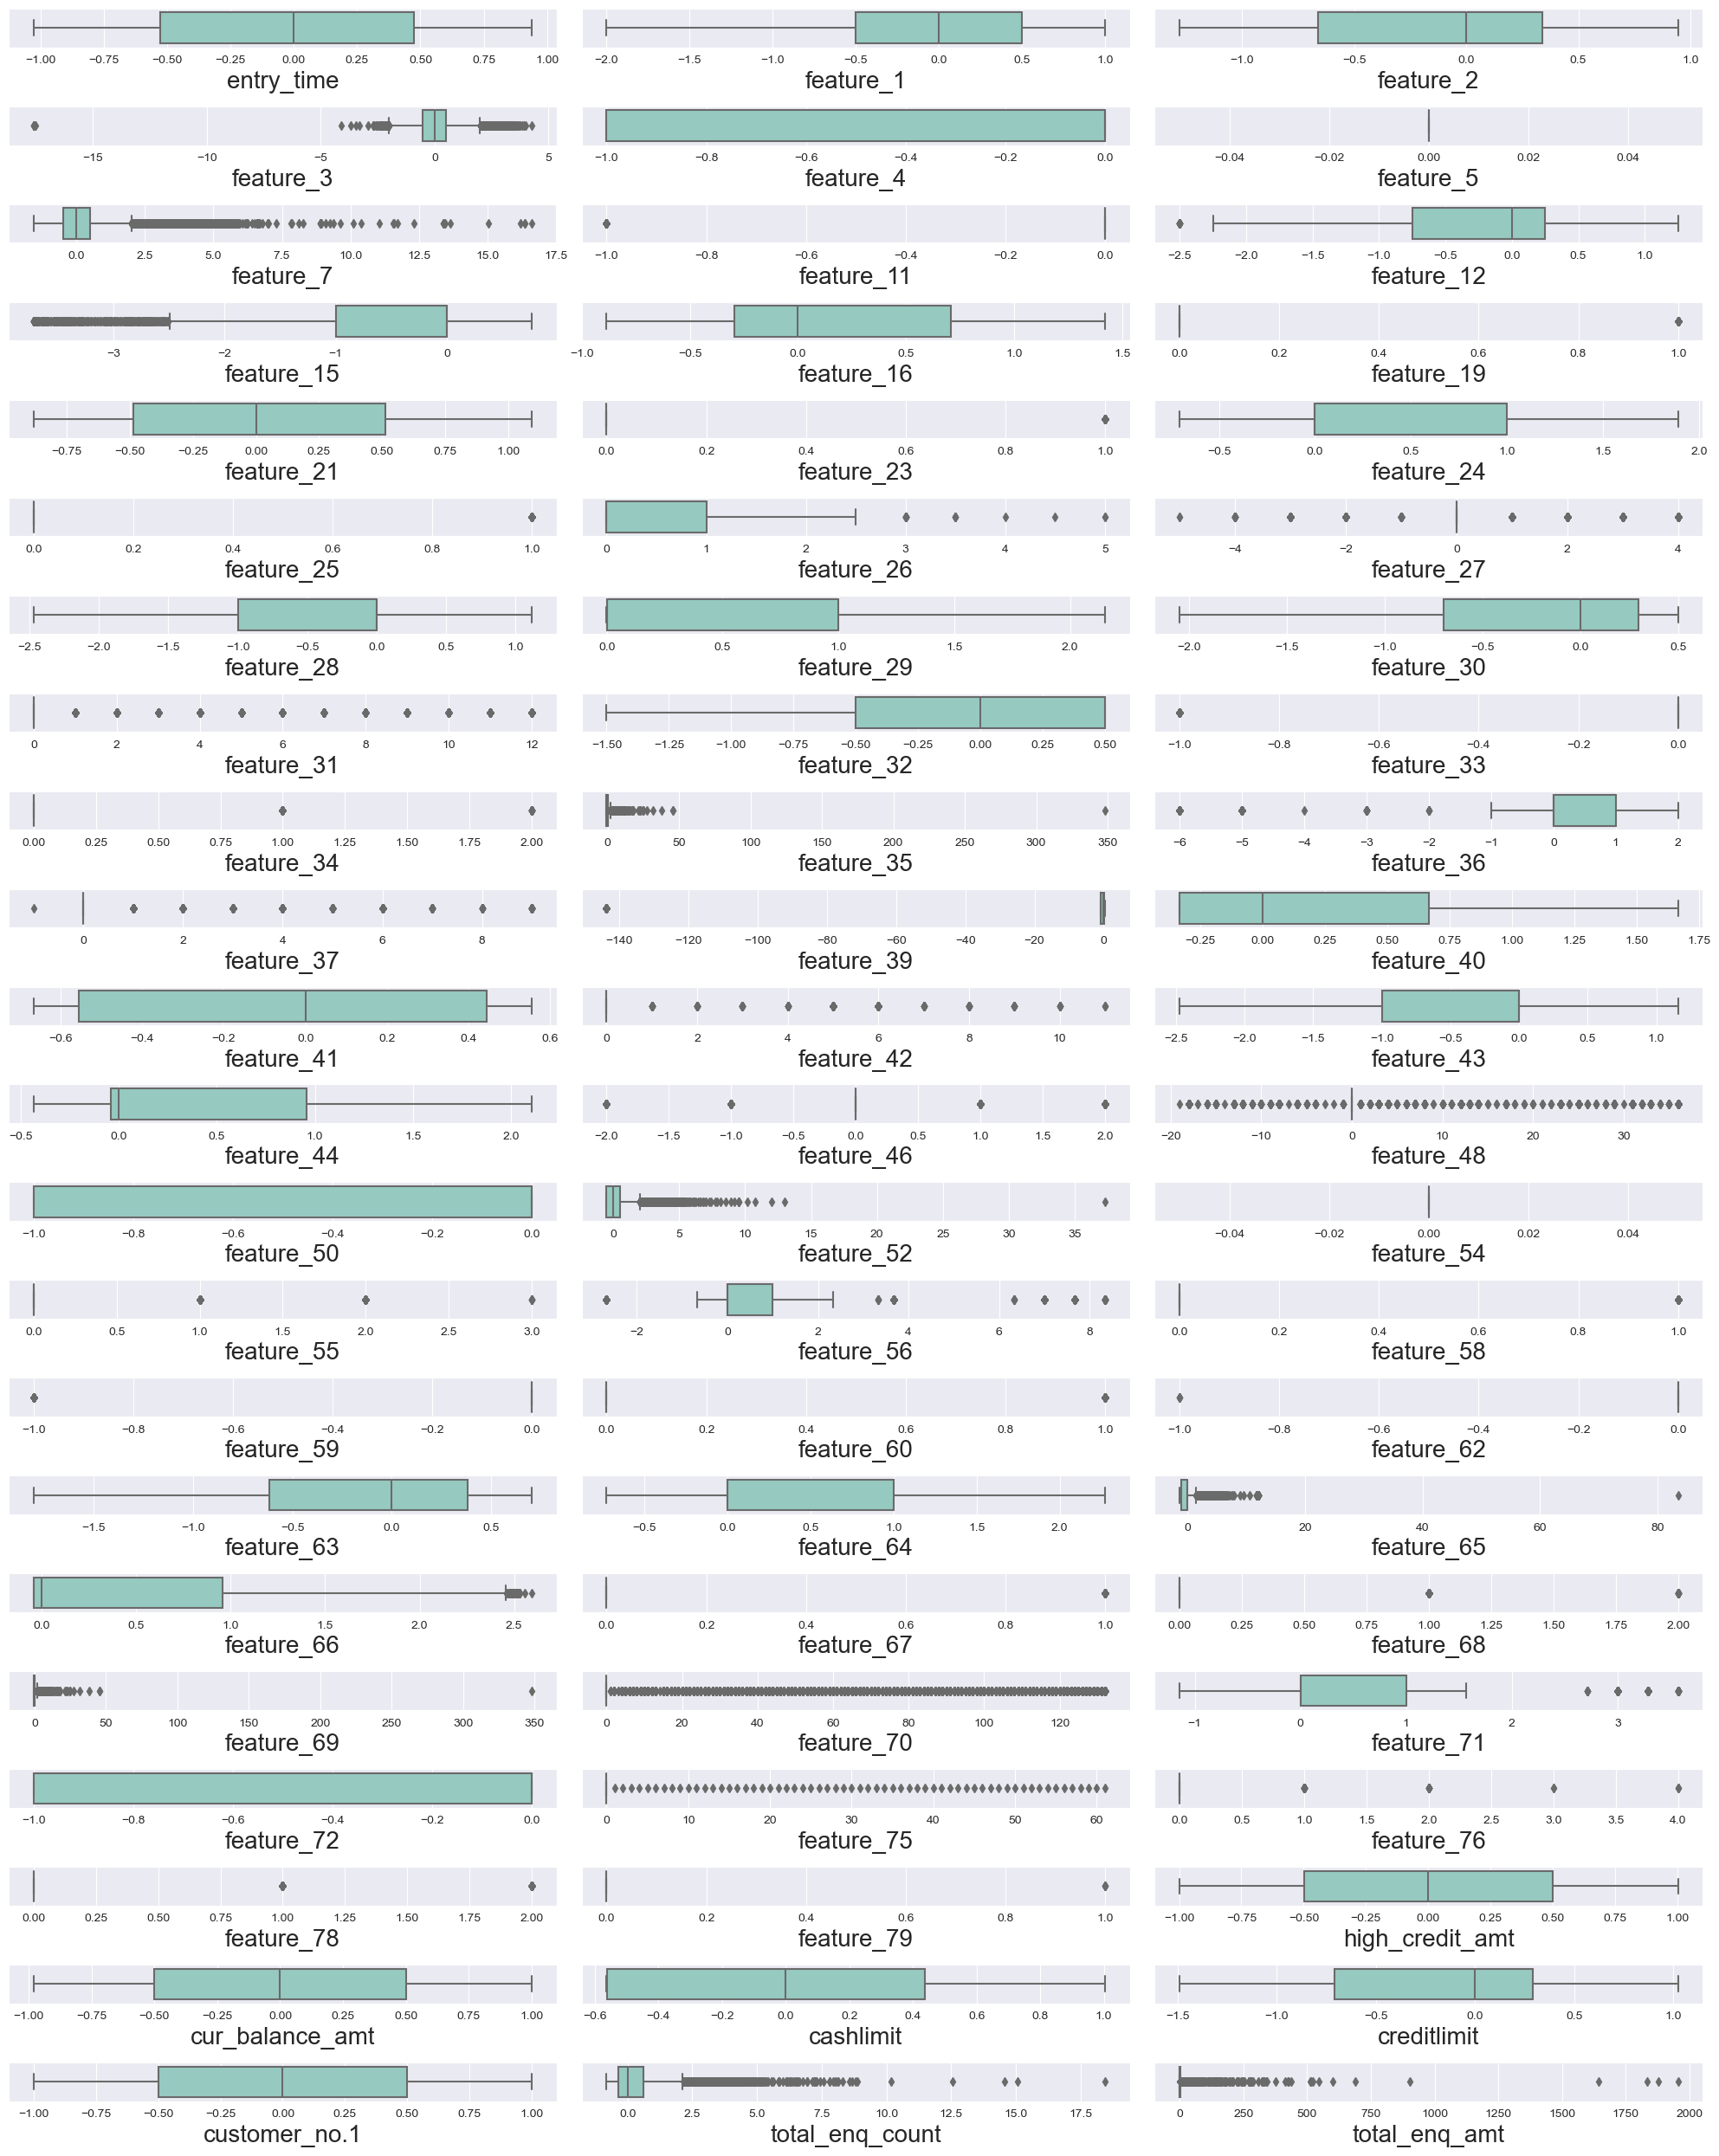

In [53]:
plt.figure(figsize=(20,25)) # defining canvas size
plotnum = 1 # counter

for column in data_2: # iteration of columns / acessing the columns from  dataset 
    if plotnum<=70:    # set the limit
        plt.subplot(22,3,plotnum) # # plotting  graphs (5-rows,3-columns) and plotnumber is for count
        sns.boxplot(x = data[column]) # Plotting box plots 
        plt.xlabel(column,fontsize=20)  # assigning name to x-axis and font size is 20
    plotnum+=1 # counter increment
plt.tight_layout()
plt.show() # used to hide the storage loction

In [54]:
data.head()

Unnamed: 0 dt_opened  customer_no  entry_time  feature_1  feature_2  \
0           0   18Apr15            1   -0.253333       -1.5  -0.420635   
1           1   21Apr15            2    0.293333       -1.5   0.198413   
2           2   22Apr15            3    0.293333       -1.5   0.198413   
3           3   25Apr15            4   -0.106667       -1.5   0.126984   
4           4   06May15            5    0.853333       -1.5   0.111111   

   feature_3  feature_4  feature_5  feature_7  feature_11  feature_12  \
0  -1.731707       -0.5        0.0   5.910448         0.0       -1.75   
1   0.951220       -1.0        0.0  16.358209         0.0       -1.75   
2   1.292683       -1.0        0.0   8.895522         0.0       -1.75   
3   1.195122       -1.0        0.0   5.910448         0.0       -1.75   
4   0.000000        0.0        0.0   5.910448         0.0       -1.75   

   feature_15  feature_16  feature_19  feature_20  feature_21  feature_22  \
0   -3.407407   -0.703540         0.0  ADFPNXXXXX   -0.663823  98332XXXXX   
1   -2.666667   -0.238938         0.0  AJWPRXXXXX    0.044411  99455XXXXX   
2   -2.666667   -0.238938         1.0  AFAPNXXXXX   -0.257114  98456XXXXX   
3   -3.432099   -0.637168         0.0  AAAPDXXXXX    0.161748  98220XXXXX   
4   -3.691358   -0.075221         0.0  ABEPSXXXXX   -0.704260  98111XXXXX   

   feature_23  feature_24  feature_25  feature_26  feature_27  feature_28  \
0         0.0    1.000000         0.0         1.0         0.0   -0.176471   
1         0.0    0.000000         0.0         1.0         0.0   -1.941176   
2         0.0    1.138686         0.0         0.0         0.0   -1.941176   
3         0.0    1.467153         0.0         1.5         0.0    0.176471   
4         0.0    1.000000         0.0         1.5         0.0   -1.117647   

   feature_29  feature_30  feature_31  feature_32  feature_33  feature_34  \
0    1.037739       -2.00         0.0         0.5         0.0         1.0   
1    1.607238       -1.80         0.0         0.5         0.0         1.0   
2    1.607238       -1.95         0.0         0.5         0.0         1.0   
3    1.074856       -0.85         0.0         0.5         0.0         1.0   
4    0.042561       -0.50         0.0         0.5         0.0         1.0   

   feature_35  feature_36  feature_37  feature_39  feature_40  feature_41  \
0    1.395381         0.0         0.0 -143.571429   -0.333333   -0.666667   
1   -0.697667         0.0         0.0 -143.571429   -0.333333   -0.666667   
2   -0.697667         0.0         0.0 -143.571429   -0.333333   -0.666667   
3    1.627945         0.0         0.0 -143.571429   -0.333333   -0.666667   
4    6.279216         0.0         0.0 -143.571429   -0.333333   -0.666667   

   feature_42  feature_43  feature_44  feature_46  feature_47  feature_48  \
0         0.0   -0.210526    0.993213         0.0  ADFPNXXXXX        31.0   
1         0.0   -2.157895    1.564667         0.0  AJWPRXXXXX        31.0   
2         0.0   -2.157895    1.564667         0.0  AFAPNXXXXX         0.0   
3         0.0    0.210526    1.032387         0.0  AAAPDXXXXX        31.0   
4         0.0   -1.000000    0.000029         0.0  ABEPSXXXXX        31.0   

   feature_50  feature_52  feature_54  feature_55  feature_56  feature_58  \
0         0.0        -0.5         0.0         0.0    3.666667         1.0   
1        -1.0        -0.5         0.0         0.0    2.333333         1.0   
2        -1.0        -0.5         0.0         2.0    2.333333         0.0   
3         0.0        -0.5         0.0         0.0    3.666667         1.0   
4        -1.0        -0.5         0.0         0.0    1.000000         1.0   

   feature_59  feature_60  feature_62  feature_63  feature_64  feature_65  \
0         0.0         0.0         0.0   -1.797695    1.000000   -1.203390   
1         0.0         0.0         0.0   -1.736236    0.636364   -1.228814   
2         0.0         0.0         0.0   -1.782330    0.636364   -1.228814   
3         0.0         0.0        

## FEATURE SELECTION :-

### DROP UNIQUE AND CONSTANT FEATURES :-

In [55]:
data.drop(['Unnamed: 0','dt_opened','entry_time','feature_5','feature_20','feature_22','feature_47','feature_54','feature_77','customer_no.1',],axis=1,inplace=True)

* In this dataset unique column available('feature_5','feature_20','feature_22','feature_   47','feature_54','feature_77') so im drop this column
* Remove unwanted columns like ids,date,time. 

### |CHANGING DATA TYPE BEFORE GET CORRELATION

In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23896 entries, 0 to 23895
Data columns (total 64 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customer_no      23896 non-null  int64  
 1   feature_1        23896 non-null  float64
 2   feature_2        23896 non-null  float64
 3   feature_3        23896 non-null  float64
 4   feature_4        23896 non-null  float64
 5   feature_7        23896 non-null  float64
 6   feature_11       23896 non-null  float64
 7   feature_12       23896 non-null  float64
 8   feature_15       23896 non-null  float64
 9   feature_16       23896 non-null  float64
 10  feature_19       23896 non-null  float64
 11  feature_21       23896 non-null  float64
 12  feature_23       23896 non-null  float64
 13  feature_24       23896 non-null  float64
 14  feature_25       23896 non-null  float64
 15  feature_26       23896 non-null  float64
 16  feature_27       23896 non-null  float64
 17  feature_28  

In [57]:
# First converet the data-type of all feature because all feature data-type is object
data = data.astype('int64')

In [58]:
# Get data type of all feature
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23896 entries, 0 to 23895
Data columns (total 64 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   customer_no      23896 non-null  int64
 1   feature_1        23896 non-null  int64
 2   feature_2        23896 non-null  int64
 3   feature_3        23896 non-null  int64
 4   feature_4        23896 non-null  int64
 5   feature_7        23896 non-null  int64
 6   feature_11       23896 non-null  int64
 7   feature_12       23896 non-null  int64
 8   feature_15       23896 non-null  int64
 9   feature_16       23896 non-null  int64
 10  feature_19       23896 non-null  int64
 11  feature_21       23896 non-null  int64
 12  feature_23       23896 non-null  int64
 13  feature_24       23896 non-null  int64
 14  feature_25       23896 non-null  int64
 15  feature_26       23896 non-null  int64
 16  feature_27       23896 non-null  int64
 17  feature_28       23896 non-null  int64
 18  featur

### CHECKING CORELATION :-

**Heatmap :-**

* A heatmap is a graphical representation of data that uses a system of color-coding to represent different values

In [59]:
data.corr()

customer_no  feature_1  feature_2  feature_3  feature_4  \
customer_no         1.000000  -0.687950  -0.030750   0.025652  -0.175635   
feature_1          -0.687950   1.000000   0.013400  -0.016073   0.101195   
feature_2          -0.030750   0.013400   1.000000   0.003436   0.041077   
feature_3           0.025652  -0.016073   0.003436   1.000000  -0.169464   
feature_4          -0.175635   0.101195   0.041077  -0.169464   1.000000   
feature_7          -0.047912  -0.061750   0.004814   0.120866  -0.044950   
feature_11         -0.032704   0.035019   0.005011   0.001046  -0.010041   
feature_12         -0.691496   0.976392   0.013861  -0.018949   0.118452   
feature_15          0.172494  -0.061104  -0.009270   0.007058   0.141353   
feature_16         -0.138198   0.110598   0.019768  -0.038518  -0.133706   
feature_19         -0.003687   0.011730  -0.000410   0.026269  -0.023271   
feature_21          0.006364  -0.005049   0.013992   0.015127  -0.010188   
feature_23         -0.096792   0.043104  -0.004053   0.036891   0.067128   
feature_24         -0.055469   0.025059   0.001759   0.020768   0.049826   
feature_25          0.035894  -0.002103   0.000675  -0.073401   0.040779   
feature_26         -0.262112   0.136285   0.012796   0.025028   0.162904   
feature_27          0.018561  -0.001454   0.006490   0.008032   0.094624   
feature_28          0.080327  -0.054785  -0.005906   0.013610   0.060293   
feature_29         -0.253892   0.145646   0.022110  -0.020931  -0.140835   
feature_30          0.007046   0.017903   0.004120  -0.044549   0.043111   
feature_31          0.199726  -0.065861  -0.047665  -0.000420  -0.224461   
feature_32          0.023333  -0.009404  -0.004301  -0.004857  -0.028924   
feature_33         -0.043709   0.017389  -0.009715   0.047295  -0.109686   
feature_34         -0.008931  -0.079464  -0.011225   0.074929  -0.119760   
feature_35         -0.017408  -0.017105   0.002801   0.047275  -0.013613   
feature_36          0.028949  -0.021310   0.006327  -0.014152  -0.054670   
feature_37          0.149054  -0.052245  -0.005020  -0.019971  -0.063118   
feature_39          0.009169   0.079884   0.010470  -0.073775   0.120331   
feature_40          0.018312   0.016528  -0.008568  -0.028425  -0.010479   
feature_41               NaN        NaN        NaN        NaN        NaN   
feature_42          0.018286   0.004346   0.005670  -0.026674   0.026968   
feature_43         -0.005007  -0.003012   0.011278   0.017119  -0.083140   
feature_44         -0.243148   0.154418   0.017903  -0.045406  -0.085898   
feature_46          0.006816  -0.012392   0.010858  -0.001458  -0.001090   
feature_48         -0.023919  -0.026377   0.017712   0.020992  -0.004899   
feature_50         -0.107861   0.057292  -0.003333  -0.044692   0.019285   
feature_52         -0.037238  -0.004067   0.001851   0.064932  -0.008763   
feature_55         -0.007239   0.007733  -0.000582   0.026493  -0.025615   
feature_56          0.026292  -0.047830  -0.000241   0.031637   0.028402   
feature_58         -0.054949  -0.048343   0.015964   0.021780  -0.065488   
feature_59         -0.032704   0.035019   0.005011   0.001046  -0.010041   
feature_60         -0.031695  -0.040985   0.010302   0.003274  -0.055577   
feature_62         -0.001077   0.001372   0.003976  -0.003485  -0.002849   
feature_63          0.004643   0.013201   0.001452  -0.040000   0.041460   
feature_64          0.015241  -0.029001   0.011611   0.005090   0.025897   
feature_65          0.056863  -0.024038   0.007608  -0.021343   0.083472   
feature_66         -0.137888   0.101626   0.010734  -0.058106  -0.004594   
feature_67          0.043709  -0.017389   0.009715  -0.047295   0.109686   
feature_68         -0.008931  -0.079464  -0.011225   0.074929  -0.119760   
feature_69         -0.017408  -0.017105   0.002801   0.047275  -0.013613   
feature_70         -0.006656  -0.079822  -0.012522   0.077757  -0.113758   
feature_71          0.057736  -0.055879  -0.002466   0.016680   0

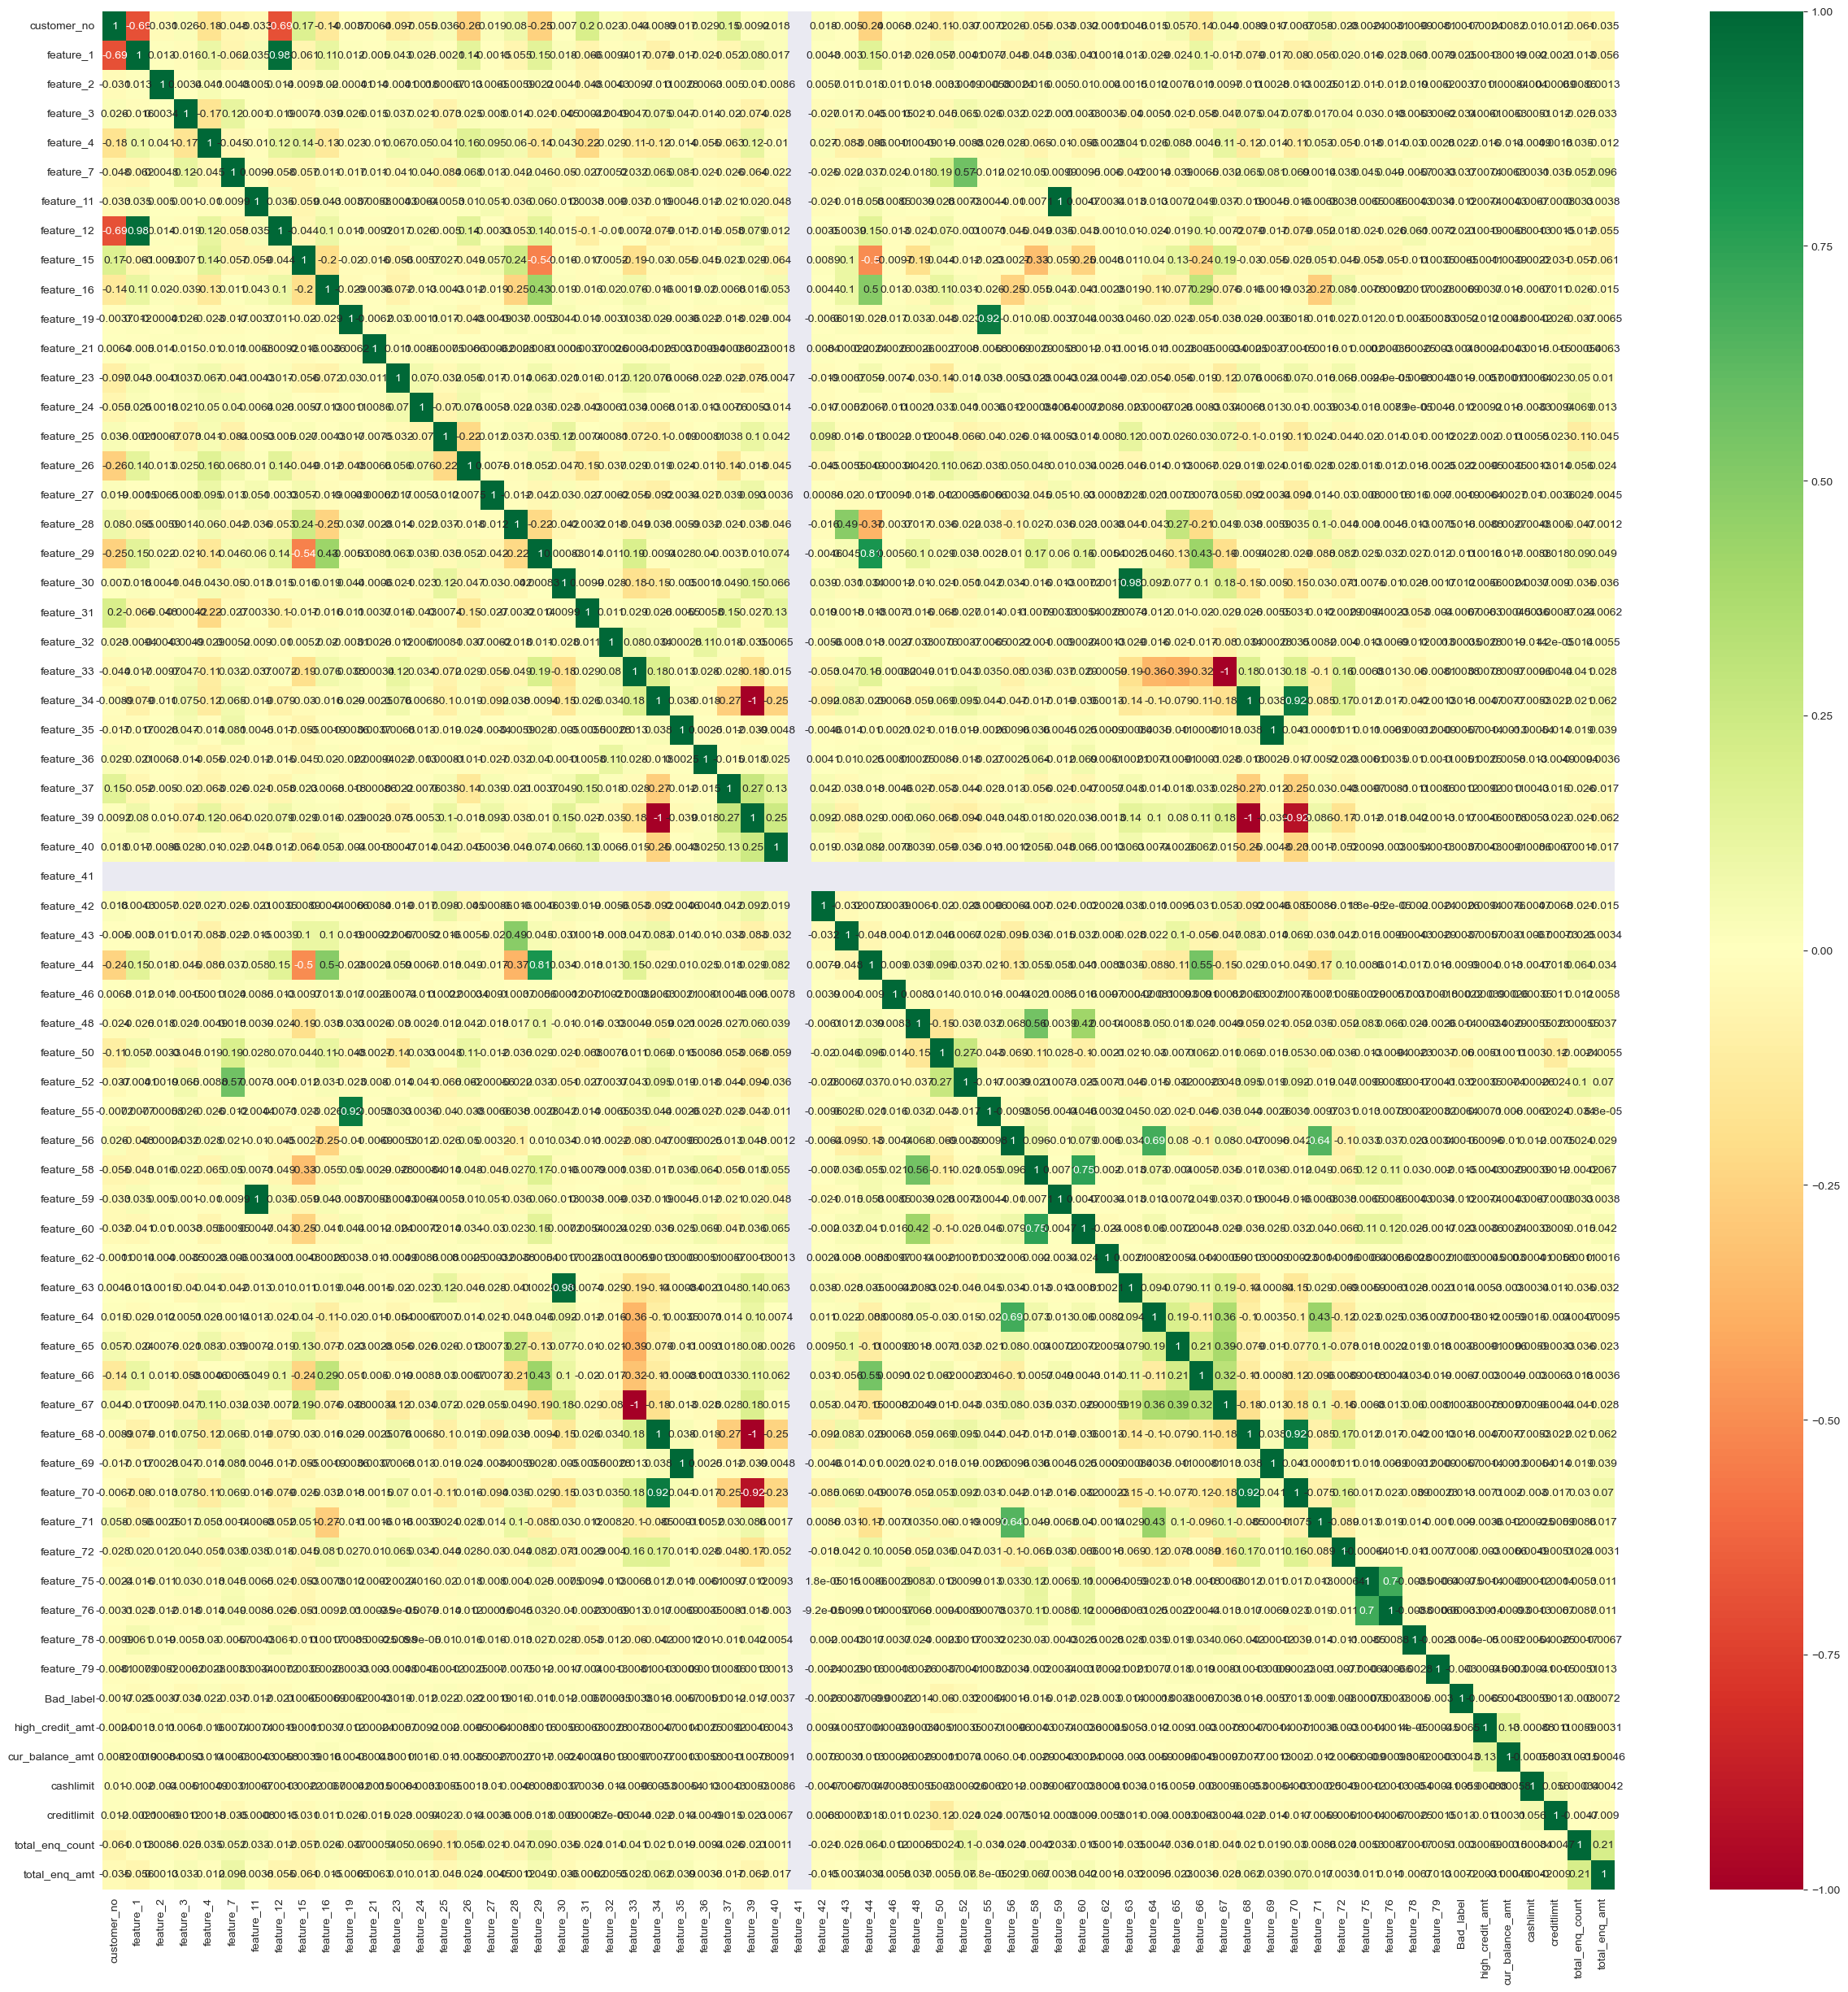

In [60]:
plt.figure(figsize=(30,30))
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn')
plt.show()

* From above heatmap scale we are clearly seen the their is very difficult to find highly correalted feature in data.

* So we confirm with the help of simple python code to check the highly correlated feature


In [61]:
 #To get highly corelated feature 
pd.set_option('display.max_rows',None)
corrmat = data.corr()
corrmat = corrmat.abs().unstack()
corrmat = corrmat.sort_values(ascending=False)
corrmat = corrmat [corrmat >= 0.9] # Set threshold 0.9
corrmat = corrmat [corrmat < 1]
corrmat = pd.DataFrame(corrmat).reset_index()
corrmat.columns = ['feature1','feature2','corr']
corrmat

feature1    feature2      corr
0   feature_39  feature_68  0.995830
1   feature_68  feature_39  0.995830
2   feature_34  feature_39  0.995830
3   feature_39  feature_34  0.995830
4   feature_12   feature_1  0.976392
5    feature_1  feature_12  0.976392
6   feature_63  feature_30  0.975522
7   feature_30  feature_63  0.975522
8   feature_39  feature_70  0.923731
9   feature_70  feature_39  0.923731
10  feature_70  feature_34  0.919709
11  feature_34  feature_70  0.919709
12  feature_70  feature_68  0.919709
13  feature_68  feature_70  0.919709
14  feature_55  feature_19  0.918357
15  feature_19  feature_55  0.918357

* Here we are going to drop highly correlated feature.

In [62]:
data.drop(['feature_63','feature_39','feature_44','feature_1','feature_70','feature_55'],axis=1,inplace=True)

In [ ]:
plt.figure(figsize=(30,30))
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn')
plt.show()

* From above heatmap scale we are clearly seen the their is no highly correlated feature in data

* But we confirm with the help of simple code

In [63]:
 #To get highly corelated feature 
pd.set_option('display.max_rows',None)
corrmat = data.corr()
corrmat = corrmat.abs().unstack()
corrmat = corrmat.sort_values(ascending=False)
corrmat = corrmat [corrmat >= 0.9] # Set threshold 0.9
corrmat = corrmat [corrmat < 1]
corrmat = pd.DataFrame(corrmat).reset_index()
corrmat.columns = ['feature1','feature2','corr']
corrmat

Empty DataFrame
Columns: [feature1, feature2, corr]
Index: []

* Now we confirm their is no highly correlated feature is present

### Checking Duplicates :-

In [64]:
data.duplicated().sum()

0

* Their is no Duplicates present in data.


# MODEL CREATION :-

## AIM :- 

* Create a sweet spots model [Low bias and Low veriance     model]
* Improve accuracy score

### HERE WE WILL BE EXPERIMENTING WITH SEVEN ALGORITHM

1. Logistic regression.
2. KNeighbourClassifier
3. Decision Tree Classifier
4. Random Forest Classifier
5. Grediant Boosting Classifier
6. XGB classifier
7. Artifical neural network

### DEFINE INDEPENDANT AND DEPENDANT VERIABLE

In [65]:
data_final = data.loc[:,['customer_no', 'feature_2', 'feature_3', 'feature_4', 'feature_7',
       'feature_11', 'feature_12', 'feature_15', 'feature_16', 'feature_19',
       'feature_21','feature_23', 'feature_24', 'feature_25',
       'feature_26', 'feature_27', 'feature_28', 'feature_29', 'feature_30',
       'feature_31', 'feature_32', 'feature_33', 'feature_34', 'feature_35',
       'feature_36', 'feature_37', 'feature_40', 'feature_41', 'feature_42',
       'feature_43', 'feature_46', 'feature_48', 'feature_50', 'feature_52',
       'feature_56', 'feature_58', 'feature_59', 'feature_60', 'feature_62',
       'feature_64', 'feature_65', 'feature_66', 'feature_67', 'feature_68',
       'feature_69', 'feature_71', 'feature_72', 'feature_75', 'feature_76',
       'feature_78', 'feature_79', 'high_credit_amt',
       'cur_balance_amt', 'cashlimit', 'creditlimit', 'total_enq_count',
       'total_enq_amt','Bad_label']]

In [66]:
data_final.head()

customer_no  feature_2  feature_3  feature_4  feature_7  feature_11  \
0            1          0         -1          0          5           0   
1            2          0          0         -1         16           0   
2            3          0          1         -1          8           0   
3            4          0          1         -1          5           0   
4            5          0          0          0          5           0   

   feature_12  feature_15  feature_16  feature_19  feature_21  feature_23  \
0          -1          -3           0           0           0           0   
1          -1          -2           0           0           0           0   
2          -1          -2           0           1           0           0   
3          -1          -3           0           0           0           0   
4          -1          -3           0           0           0           0   

   feature_24  feature_25  feature_26  feature_27  feature_28  feature_29  \
0           1           0           1           0           0           1   
1           0           0           1           0          -1           1   
2           1           0           0           0          -1           1   
3           1           0           1           0           0           1   
4           1           0           1           0          -1           0   

   feature_30  feature_31  feature_32  feature_33  feature_34  feature_35  \
0          -2           0           0           0           1           1   
1          -1           0           0           0           1           0   
2          -1           0           0           0           1           0   
3           0           0           0           0           1           1   
4           0           0           0           0           1           6   

   feature_36  feature_37  feature_40  feature_41  feature_42  feature_43  \
0           0           0           0           0           0           0   
1           0           0           0           0           0          -2   
2           0           0           0           0           0          -2   
3           0           0           0           0           0           0   
4           0           0           0           0           0          -1   

   feature_46  feature_48  feature_50  feature_52  feature_56  feature_58  \
0           0          31           0           0           3           1   
1           0          31          -1           0           2           1   
2           0           0          -1           0           2           0   
3           0          31           0           0           3           1   
4           0          31          -1           0           1           1   

   feature_59  feature_60  feature_62  feature_64  feature_65  feature_66  \
0           0           0           0           1          -1           0   
1           0           0           0           0          -1           1   
2           0           0           0           0          -1           1   
3           0           0           0           1          -1           0   
4           0           0           0           0          -1           0   

   feature_67  feature_68  feature_69  feature_71  feature_72  feature_75  \
0           0           1           1           1           0           0   
1           0           1           0           1           0           0   
2           0           1           0           1           0           0   
3           0           1           1           1           0          50   
4           0           1           6           0           0           0   

   feature_76  feature_78  feature_79  high_credit_amt  cur_balance_amt  \
0           0           0           0                0                0   
1           0           0           0                0                0   
2           0           0           0                0                0   
3           1    

In [67]:
X = data_final.iloc[:,:-1]
y = data_final.Bad_label

In [68]:
y.value_counts()

0    22892
1     1004
Name: Bad_label, dtype: int64

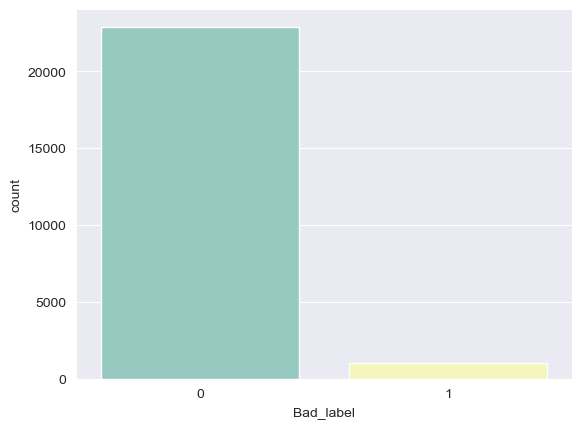

In [69]:
#Plotting the graph
sns.countplot(y)
plt.show()

#### BALANCING THE TARGET COLUMN USING SMOTE

In [70]:
y.value_counts(normalize=True)*100

0    95.79846
1     4.20154
Name: Bad_label, dtype: float64

In [71]:
from collections import Counter
from imblearn.over_sampling import SMOTE #SMOTE(synthetic minority oversampling techinque)
sm = SMOTE() # obeject creation
print("unbalanced data   :  ",Counter(y))
X_sm,y_sm = sm.fit_resample(X,y)
print("balanced data:    :",Counter(y_sm))

unbalanced data   :   Counter({0: 22892, 1: 1004})
balanced data:    : Counter({0: 22892, 1: 22892})


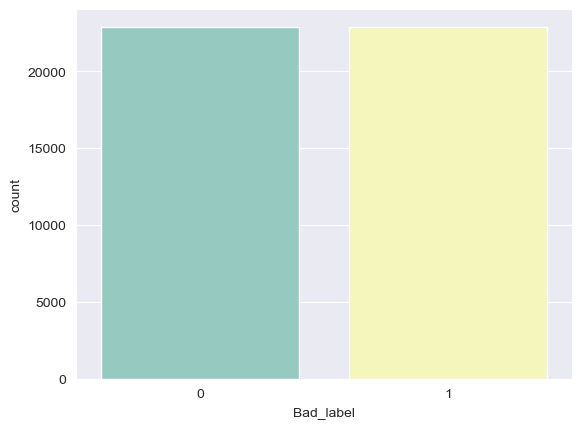

In [72]:
#Plotting the graph
sns.countplot(y_sm)
plt.show()

## SPLIT TRAINING AND TESTING DATA :-

In [73]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_sm,y_sm,random_state=10,test_size=.2)

In [74]:
# Check shape of train and test
X_train.shape

(36627, 57)

In [75]:
X_test.shape

(9157, 57)

In [76]:
y_train.shape

(36627,)

In [77]:
y_test.shape

(9157,)

## 1. Logisticregression :-

In [78]:
# Step:1 importing library
from sklearn.linear_model import LogisticRegression

# Step:2 Object creation
log_model = LogisticRegression()

# Step:3 Fitting the training data
log_model.fit(X_train,y_train)

# Step:4 Prediction on test data
log_test_predict = log_model.predict(X_test)

# Step:5 Prediction on training data
log_train_predict = log_model.predict(X_train)

### EVALUATION :-

**TRAINING ACCURACY :-**

In [79]:
# importing library
from sklearn.metrics import accuracy_score,recall_score,f1_score,classification_report,accuracy_score,roc_auc_score
log_train_accuracy = accuracy_score(log_train_predict,y_train)
print("Training accuracy of Logistic regression model",log_train_accuracy*100)
print("Logistic regression training Classification report: \n",classification_report(log_train_predict,y_train))

Training accuracy of Logistic regression model 74.45600240259918
Logistic regression training Classification report: 
               precision    recall  f1-score   support

           0       0.78      0.73      0.75     19456
           1       0.71      0.76      0.74     17171

    accuracy                           0.74     36627
   macro avg       0.74      0.75      0.74     36627
weighted avg       0.75      0.74      0.74     36627



**TESTING ACCURACY :-**

In [81]:
log_test_accuracy = accuracy_score(log_test_predict,y_test)
print("Testing accuracy of Logistic regession model",log_test_accuracy*100)
print("Logistic regression testing Classification report: \n",classification_report(log_test_predict,y_test))

Testing accuracy of Logistic regession model 73.8779076116632
Logistic regression testing Classification report: 
               precision    recall  f1-score   support

           0       0.77      0.73      0.75      4886
           1       0.71      0.75      0.73      4271

    accuracy                           0.74      9157
   macro avg       0.74      0.74      0.74      9157
weighted avg       0.74      0.74      0.74      9157



* Logisticregression classifier  model  is well work on training and testing side.

### USE BAGGING ON LOGISTIC REGRESSION MODEL

In [111]:
# Step:1 Create logistic regression object
log_reg1 = LogisticRegression()

# Step:2 importing library and creating bagging object
from sklearn.ensemble import BaggingClassifier
bagg = BaggingClassifier(base_estimator=log_reg1,n_estimators=45)
#base_estimator---> algorithm which you want to pass
#n_estimotors-----> number of base learners

# Step:3 Fitting the training data
bagg.fit(X_train,y_train)

# Step:4 Prediction on test data
bagg_predict = bagg.predict(X_test)

In [112]:
bagg_recall = accuracy_score(bagg_predict,y_test)
print("Racall score after bagging",bagg_recall)

Racall score after bagging 0.7777656437697936


* After apply bagging score is slightly improve

## 2.KNeighboursClassifier :-

In [82]:
# Step:1 Taking the optimal value of k
from sklearn.neighbors import KNeighborsClassifier
error_rate = [] # Creating empty list
for i in range(2,11):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    y_knn_predict = knn.predict(X_test)
    error_rate.append(np.mean(y_knn_predict != y_test))
print("Error rate:",error_rate)

Error rate: [0.17964398820574423, 0.2387244730807033, 0.21939499836190893, 0.2573987113683521, 0.24669651632630774, 0.27399803429070657, 0.2608933056677951, 0.28513705362018127, 0.2721415310691274]


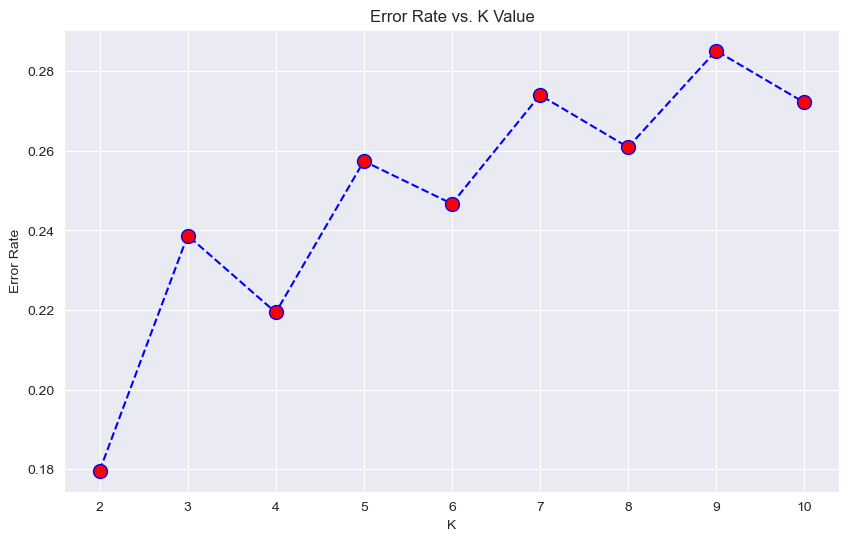

In [83]:
# Step:2 Plotting the error rate
plt.figure(figsize=(10,6))
plt.plot(range(2,11),error_rate,color='blue', linestyle='dashed',marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

In [84]:
# Step:3 Get nearst neighbors
knn1 = KNeighborsClassifier(n_neighbors=4)

# Step:4 Fitting the training data
knn1.fit(X_train,y_train)

# Step:5 Prediction on testing data
knn_test_predict = knn1.predict(X_test)

# Step:6 Prediction on training data
knn_train_predict = knn1.predict(X_train)

### EVALUATION :-

**TRAINING ACCURACY :-**

In [85]:
knn_train_accuracy = accuracy_score(y_train,knn_train_predict)
print("Training accuracy of knn model ",knn_train_accuracy*100)
print("Training classification report:\n",classification_report(knn_train_predict,y_train))


Training accuracy of knn model  87.73036284708002
Training classification report:
               precision    recall  f1-score   support

           0       0.83      0.92      0.87     16458
           1       0.93      0.84      0.88     20169

    accuracy                           0.88     36627
   macro avg       0.88      0.88      0.88     36627
weighted avg       0.88      0.88      0.88     36627



* KNN claaifier model is slightly perform well accuracy on training data.

**TESTING ACCURACY :-**

In [86]:
knn_test_accuracy = accuracy_score(y_test,knn_test_predict)
print("Testing accuracy of knn model",knn_test_accuracy*100)
print("Testing classification report: \n",classification_report(y_test,knn_test_predict))

Testing accuracy of knn model 78.06050016380911
Testing classification report: 
               precision    recall  f1-score   support

           0       0.85      0.69      0.76      4618
           1       0.73      0.88      0.80      4539

    accuracy                           0.78      9157
   macro avg       0.79      0.78      0.78      9157
weighted avg       0.79      0.78      0.78      9157



* But testing accuracy is still lagging so i apply bagging


### USE BAGGING ON KNEIGHBOURS CLASSIFIER

In [87]:
# step:1 Create a K-neighbour classifier object
knn1 = KNeighborsClassifier(n_neighbors=3)

# Step:2 importing library and creating bagging object
from sklearn.ensemble import BaggingClassifier
bagg = BaggingClassifier(base_estimator=knn1,n_estimators=50)
#base_estimator---> algorithm which you want to pass
#n_estimotors-----> number of base learners

# Step:3 Fitting the training data
bagg.fit(X_train,y_train)

# Step:4 Prediction on test data
bagg_predict = bagg.predict(X_test)

#### EVALUATION

In [89]:
bagg_accuracy = accuracy_score(y_test,bagg_predict)
print("Score after bagging:",bagg_accuracy*100)

Score after bagging: 76.6845036584034


* Score Not improve after bagging .

## 3.Decision Tree

In [93]:
# Step:1 Importing library and object creation
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()

# Step:2 fitting training data
dtc.fit(X_train,y_train)

# Step:3 Prediction on test data
dtc_test_predict = dtc.predict(X_test)

# Step:4 Prediction on training data
dtc_train_predict = dtc.predict(X_train)

### EVALUATION :-

**TRAINING ACCURACY :-**

In [91]:
dtc_train_accuracy = accuracy_score(y_train,dtc_train_predict)
print("Training accuracy of Decision tree classifier:",dtc_train_accuracy*100)
print("classification report of training:"'\n',classification_report(y_train,dtc_train_predict))

Training accuracy of Decision tree classifier: 100.0
classification report of training:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     18274
           1       1.00      1.00      1.00     18353

    accuracy                           1.00     36627
   macro avg       1.00      1.00      1.00     36627
weighted avg       1.00      1.00      1.00     36627



**TESTING ACCURACY :-**

In [92]:
dtc_test_accuracy = accuracy_score(y_test,dtc_test_predict)
print("Training accuracy of Decision tree classifier:",dtc_test_accuracy*100)
print("classification report of training:"'\n',classification_report(y_test,dtc_test_predict))

Training accuracy of Decision tree classifier: 92.61766954242657
classification report of training:
               precision    recall  f1-score   support

           0       0.95      0.90      0.93      4618
           1       0.91      0.95      0.93      4539

    accuracy                           0.93      9157
   macro avg       0.93      0.93      0.93      9157
weighted avg       0.93      0.93      0.93      9157



## 4.Random Forest Classifier :-

In [94]:
# Step:1 import library and object creation
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

# Step:2 fitting the training data
rf.fit(X_train,y_train)

# Step:3 Prediction on test data
rf_test_predict = rf.predict(X_test)

# Step:4 Prediction on training data
rf_train_predict = rf.predict(X_train)

### EVALUATION :-

**TRAINING ACCURACY :-**

In [95]:
rf_train_accuracy = accuracy_score(y_train,rf_train_predict)
print("Training accuracy of random forest classifier:",rf_train_accuracy*100)
print("Classification report of training:"'\n',classification_report(y_train,rf_train_predict))

Training accuracy of random forest classifier: 100.0
Classification report of training:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     18274
           1       1.00      1.00      1.00     18353

    accuracy                           1.00     36627
   macro avg       1.00      1.00      1.00     36627
weighted avg       1.00      1.00      1.00     36627



**TESTING ACCURACY :-**

In [96]:
rf_test_accuracy = accuracy_score(y_test,rf_test_predict)
print("Testing accuracy of random forest classifier:",rf_test_accuracy*100)
print("Classification report of training:"'\n',classification_report(y_test,rf_test_predict))

Testing accuracy of random forest classifier: 96.5163263077427
Classification report of training:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97      4618
           1       0.97      0.95      0.96      4539

    accuracy                           0.97      9157
   macro avg       0.97      0.97      0.97      9157
weighted avg       0.97      0.97      0.97      9157



## 5.Geadient Boosting Classifier

In [97]:
# Step:1 Object cretion
from sklearn.ensemble import GradientBoostingClassifier
gbm=GradientBoostingClassifier(learning_rate=0.1,n_estimators=150,random_state=42)

# Step:2 fitting the training data
gbm.fit(X_train,y_train) ## fitting the data

# Step:3 prediction on test data
gbm_test_predict=gbm.predict(X_test)

# Step:4 Prediction on train data
gbm_train_predict = gbm.predict(X_train)

### EVALUATION :-

**TRAINING ACCURACY :-**

In [98]:
gbm_train_accuracy = accuracy_score(y_train,gbm_train_predict)
print("Grediant boosting classifier training accuracy:",gbm_train_accuracy*100)
print("Classification report of training:"'\n',classification_report(y_train,gbm_train_predict))

Grediant boosting classifier training accuracy: 92.44546372894314
Classification report of training:
               precision    recall  f1-score   support

           0       0.93      0.92      0.92     18274
           1       0.92      0.93      0.93     18353

    accuracy                           0.92     36627
   macro avg       0.92      0.92      0.92     36627
weighted avg       0.92      0.92      0.92     36627



**TESTING ACCURACY :-**

In [99]:
gbm_test_accuracy = accuracy_score(y_test,gbm_test_predict)
print("Grediant boosting classifier testing accuracy:",gbm_test_accuracy*100)
print("Classification report of testing:"'\n',classification_report(y_test,gbm_test_predict))

Grediant boosting classifier testing accuracy: 92.41017800589712
Classification report of testing:
               precision    recall  f1-score   support

           0       0.93      0.92      0.92      4618
           1       0.92      0.93      0.92      4539

    accuracy                           0.92      9157
   macro avg       0.92      0.92      0.92      9157
weighted avg       0.92      0.92      0.92      9157



* Grediant bossting classifier is well work on training and testing side.

## 6. XGB Classifier :-

In [100]:
# Step:1 import library and object creation
import xgboost
from xgboost import XGBClassifier
xgb = XGBClassifier()

# Step:2 Fitting the training data
xgb.fit(X_train,y_train)

# Step:3 Prediction on training data
xgb_train_predict = xgb.predict(X_train)

# Step:4 Prediction on testing data
xgb_test_predict = xgb.predict(X_test)

### EVALUATION :-

**TRAINING ACCURACY :-**

In [101]:
xgb_train_accuracy = accuracy_score(xgb_train_predict,y_train)
print("Training accuracy of xgb model",xgb_train_accuracy*100)
print("Classifiaction report on training: \n",classification_report(xgb_train_predict,y_train))

Training accuracy of xgb model 96.3469571627488
Classifiaction report on training: 
               precision    recall  f1-score   support

           0       0.97      0.96      0.96     18494
           1       0.96      0.97      0.96     18133

    accuracy                           0.96     36627
   macro avg       0.96      0.96      0.96     36627
weighted avg       0.96      0.96      0.96     36627



**TESTING ACCURACY :-**

In [102]:
xgb_test_accuracy = accuracy_score(xgb_test_predict,y_test)
print("Testing accuracy of xgb model",xgb_test_accuracy*100)
print("Classification report on testing: \n",classification_report(xgb_test_predict,y_test))

Testing accuracy of xgb model 95.42426558916675
Classification report on testing: 
               precision    recall  f1-score   support

           0       0.96      0.95      0.95      4633
           1       0.95      0.96      0.95      4524

    accuracy                           0.95      9157
   macro avg       0.95      0.95      0.95      9157
weighted avg       0.95      0.95      0.95      9157



## 7.Artifial Neural Network

In [103]:
# Step:1 Importing library and object creation
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(hidden_layer_sizes=(50,2),
                      learning_rate='constant',
                      max_iter=1000,
                      random_state=45)

# Step:2 Fitting the training data
model.fit(X_train,y_train)

MLPClassifier(hidden_layer_sizes=(50, 2), max_iter=1000, random_state=45)

In [104]:
# Step:3 Predicting the probability
mlp_prdict_probability = model.predict_proba(X_test)
mlp_prdict_probability

array([[0.49920934, 0.50079066],
       [0.49920934, 0.50079066],
       [0.49920934, 0.50079066],
       ...,
       [0.49920934, 0.50079066],
       [0.49920934, 0.50079066],
       [0.49920934, 0.50079066]])

In [105]:
# Step:4 Prediction on test data
mlp_test_predict = model.predict(X_test)

# Step:5 Prediction on training data
mlp_train_predict = model.predict(X_train)

### EVALUATION :-

**TRAINING ACCURACY :-**

In [106]:
mlp_train_accuracy = accuracy_score(mlp_train_predict,y_train)
print("Training accuracy of MLP model is:",mlp_train_accuracy*100)
print("Classification report of training:"'\n',classification_report(mlp_train_predict,y_train))

Training accuracy of MLP model is: 50.200671635678596
Classification report of training:
               precision    recall  f1-score   support

           0       0.00      1.00      0.00        34
           1       1.00      0.50      0.67     36593

    accuracy                           0.50     36627
   macro avg       0.50      0.75      0.34     36627
weighted avg       1.00      0.50      0.67     36627



**TESTING ACCURACY :-**

In [107]:
mlp_test_accuracy = accuracy_score(mlp_test_predict,y_test)
print("Testing accuracy of MLP model is:",mlp_test_accuracy*100)
print("Classification report of testing:"'\n',classification_report(mlp_test_predict,y_test))

Testing accuracy of MLP model is: 49.68876269520585
Classification report of testing:
               precision    recall  f1-score   support

           0       0.00      1.00      0.00        11
           1       1.00      0.50      0.66      9146

    accuracy                           0.50      9157
   macro avg       0.50      0.75      0.33      9157
weighted avg       1.00      0.50      0.66      9157



* ANN model not perform well on training as well as testing data

### OBSERVATION:

* Logisticregression classifier model is well work on training data as well as testing data And The score of training and         testing data is 74 %. But Testing accuracy is still lagging so i apply bagging. After apply bagging score is slightly           improve(After bagging score = 77.76%).

* KNeighboursClassifier model is slightly perform well accuracy on training data as well as testing data. The score of training   and testing data with respect to 87.73% & 78.03% .Testing accuracy is still lagging so i apply bagging. but Score Not           improve after bagging (Aftre bagging score = 76.86%.

* Decision Tree Classifeir model is very well work on training data and The score of training data is 100% .Testing data is       also good and testing score is 93%.

* Random Forest Classifier model is also very well work on training data and The score of training data is 100% .Testing data is   also good and testing score is 96.51%.

* Geadient Boosting Classifier model is good work on training and teasting data. it's score is also same like training score is   92.44% and testing score is 92.41%.

* XGB Classifier model is perform well accuracy on training data as well as testing data. The score of training and testing data   with respect to 96.34% & 95.42% .

* ANN model not perform well on training as well as testing data.

## Conclusion :-

**From above all model Im select XGB classifier beacuse this model perform well on training as well as testing side and low variance and low bias model**

# MODEL SAVING

In [ ]:
# Model saving using pickel
import pickle

file = open("XGB_classifier_model.pkl","wb")

# Dump information on file
pickle.dump(gbm,file)